# Social Network Analysis - Amber Heard Case - Instagram
Adel Abu Hashim & Mahmoud Nagy - November 2021

## Table of Contents
<ul>
<li><a href="#intro"><b>Introduction</b></a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This case study aims to help **Amber Heard** <br>
> 
> By analyzing new accounts posting/ commenting against a victim of a Social Bot Disinformation/Influence Operation. 
> 
> **We have two main datasets**: <br>
>(The datasets screaped from **Instagram**).
> - 1- A dataset with posts data.
> - 2- A dataset with comments data.

In [1]:
import pandas as pd
import os
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go
import warnings
import re
import seaborn as sb
import re

warnings.filterwarnings("ignore")

import plotly.io as pio
from helpers import barh, pie, get_top, handler, isnull, bar, bar_peaks, facet_days

pio.renderers
# pio.renderers.default = "svg"
svg_renderer = pio.renderers["svg"]
svg_renderer.width = 950
svg_renderer.height = 550

%matplotlib inline

In [2]:
os.chdir("../Data")

In [3]:
ls

1Mil Instagram AH SNA comments.zip
Instagram Posts - AH 2018-2021 study 193K.zip
Instagram SNA AH comments.zip
comments.csv
comments_cleaned.csv
comments_text.csv
posts.csv
posts_cleaned.csv


In [4]:
original_comments = pd.read_csv('comments.csv')

In [5]:
original_comments.head()

,message,timestamp,id,n_replies,n_likes,media_id,in_reply_to,from.id,from.username,from.is_verified,from.url,from.profile_pic
0,#scarlettjohansson #alexandradaddario #emiliac...,1.592888e+09,1.791523e+16,0.0,0.0,2.337635e+18,NaN,3.988264e+09,scarlettjohansonoffcial,False,https://www.instagram.com/scarlettjohansonoffcial,NaN
1,🔥🔥❤️,1.592888e+09,1.784587e+16,0.0,0.0,2.337635e+18,NaN,3.988264e+09,scarlettjohansonoffcial,False,https://www.instagram.com/scarlettjohansonoffcial,NaN
2,Very beautiful 😘❤️❤️❤️i love you very much 😍💘💘...,1.592888e+09,1.788947e+16,0.0,0.0,2.337635e+18,NaN,1.230201e+10,fr.ederic2368,False,https://www.instagram.com/fr.ederic2368,NaN
3,❤️❤️❤️❤️❤️❤️,1.592889e+09,1.786950e+16,0.0,0.0,2.337635e+18,NaN,2.490417e+09,muataz_87,False,https://www.instagram.com/muataz_87,NaN
4,Bombón bello 💖💖💖💖💖,1.592889e+09,1.806608e+16,0.0,0.0,2.337635e+18,NaN,1.521544e+09,jorgero122129,False,https://www.instagram.com/jorgero122129,NaN


<a id='eda'></a>
## Exploratory Data Analysis
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda"><b>Exploratory Data Analysis</b></a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='comments'></a>
## Comments
> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks">Investigate Peaks</a></li>
 <li><a href="#top_peaks">Comments on Peak Days</a></li>
 <li><a href="#top_hours">Comments on Peak Hours</a></li>
 <li><a href="#top_times">Comments on Peak Times</a></li> 
 </ul>

In [39]:
df_comments = pd.read_csv("comments_cleaned.csv")
print(df_comments.shape)
df_comments.head()

(1751113, 16)


,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour
0,#scarlettjohansson #alexandradaddario #emiliac...,2020-06-23 06:50:19,17915232430430980,0.0,0.0,2337634847974873088,n,3988263563,scarlettjohansonoffcial,False,https://www.instagram.com/scarlettjohansonoffcial,2020,Jun,23,2020-06-23,6
1,🔥🔥❤️,2020-06-23 06:50:20,17845867817208020,0.0,0.0,2337634847974873088,n,3988263563,scarlettjohansonoffcial,False,https://www.instagram.com/scarlettjohansonoffcial,2020,Jun,23,2020-06-23,6
2,very beautiful 😘❤️❤️❤️i love you very much 😍💘💘...,2020-06-23 06:54:04,17889474637566402,0.0,0.0,2337634847974873088,n,12302008022,fr.ederic2368,False,https://www.instagram.com/fr.ederic2368,2020,Jun,23,2020-06-23,6
3,❤️❤️❤️❤️❤️❤️,2020-06-23 07:12:28,17869498675832482,0.0,0.0,2337634847974873088,n,2490417195,muataz_87,False,https://www.instagram.com/muataz_87,2020,Jun,23,2020-06-23,7
4,bombón bello 💖💖💖💖💖,2020-06-23 07:14:40,18066076495222844,0.0,0.0,2337634847974873088,n,1521544054,jorgero122129,False,https://www.instagram.com/jorgero122129,2020,Jun,23,2020-06-23,7


In [40]:
df_comments["datetime"] = pd.to_datetime(df_comments["datetime"])
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751113 entries, 0 to 1751112
Data columns (total 16 columns):
 #   Column       Dtype         
---  ------       -----         
 0   message      object        
 1   datetime     datetime64[ns]
 2   id           int64         
 3   n_replies    float64       
 4   n_likes      float64       
 5   media_id     int64         
 6   parent_id    object        
 7   user_id      int64         
 8   username     object        
 9   is_verified  bool          
 10  account_url  object        
 11  year         int64         
 12  month        object        
 13  dayofmonth   int64         
 14  date         object        
 15  hour         int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(6), object(6)
memory usage: 202.1+ MB


In [41]:
isnull(df_comments)

The number of NaNs in message: 0
The number of NaNs in datetime: 0
The number of NaNs in id: 0
The number of NaNs in n_replies: 335514
The number of NaNs in n_likes: 0
The number of NaNs in media_id: 0
The number of NaNs in parent_id: 0
The number of NaNs in user_id: 0
The number of NaNs in username: 0
The number of NaNs in is_verified: 0
The number of NaNs in account_url: 0
The number of NaNs in year: 0
The number of NaNs in month: 0
The number of NaNs in dayofmonth: 0
The number of NaNs in date: 0
The number of NaNs in hour: 0


<a id='over_time'></a>
> ## Exploring Comments Created OVER TIME
> <ul>
 <li><a href="#over_time"><b>Comments Created OVER TIME</b></a></li>
 <li><a href="#peaks">Investigate Peaks</a></li>
 <li><a href="#top_peaks">Comments on Peak Days</a></li>
 <li><a href="#top_hours">Comments on Peak Hours</a></li>
 <li><a href="#top_times">Comments on Peak Times</a></li> 
 </ul>

<a id='all_years'></a>
>>### Comments Created in Each Year
> <ul>
 <li><a href="#all_years"><b>Comments Created in Each Year</b></a></li>
 <li><a href="#all_months">Comments Created in Each Month</a></li>
 <li><a href="#all_days">Comments Created in Each Day</a></li>
 <li><a href="#2018_days">Comments Created in Each Day of 2018</a></li>
 <li><a href="#2019_days">Comments Created in Each Day of 2019</a></li>
 <li><a href="#2020_days">Comments Created in Each Day of 2020</a></li>
 <li><a href="#2021_days">Comments Created in Each Day of 2021</a></li>
 </ul>

In [42]:
df_years = (
    df_comments.groupby(df_comments["year"])["message"]
    .count()
    .reset_index(name="n_comments")
)
df_years

,year,n_comments
0,2014,4
1,2015,1
2,2016,15
3,2017,116
4,2018,227847
5,2019,333197
6,2020,711339
7,2021,478594


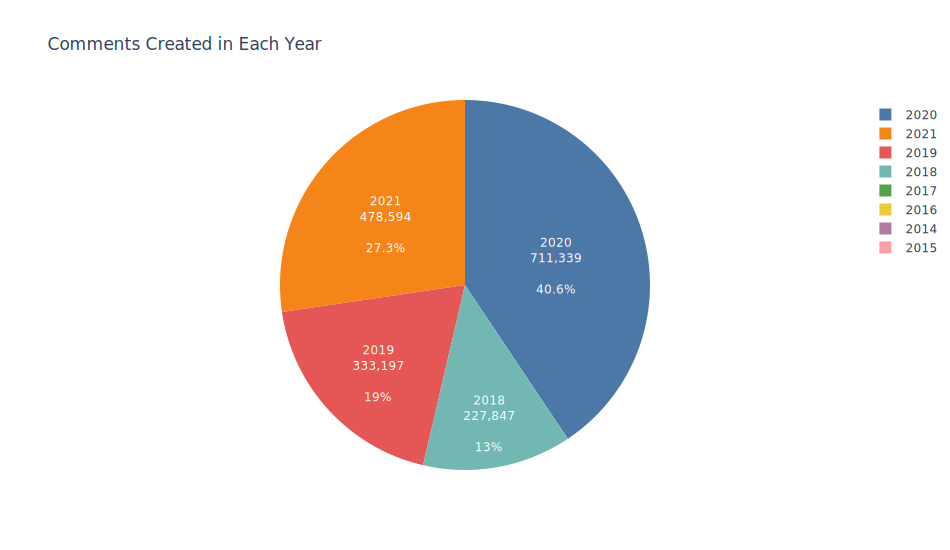

In [43]:
pie(df_years, "Comments Created in Each Year")

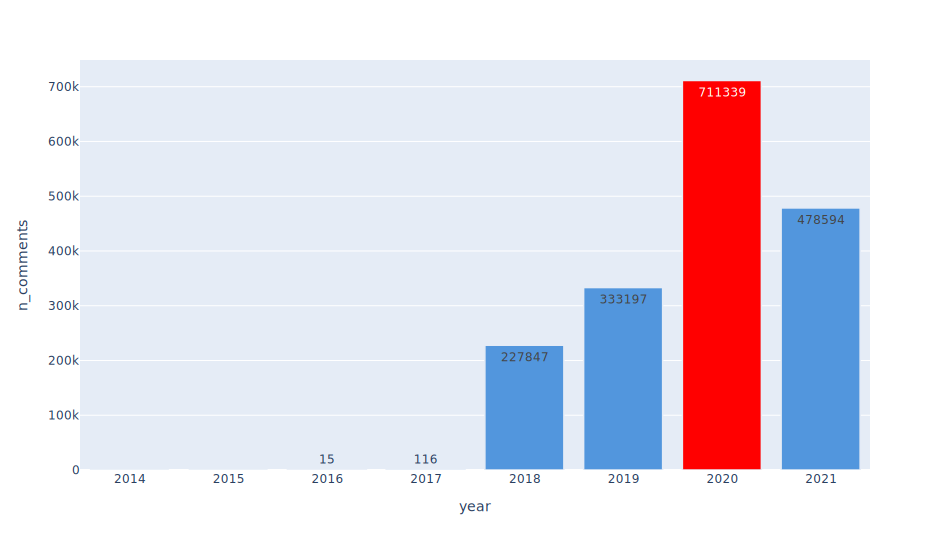

In [44]:
bar(df_years, "year", "n_comments", "Comments Created in Each Year", margin=700000)

Instagram/ Initial release date: October 2010

<a id='all_months'></a>
>>### Comments Created in Each Month
> <ul>
 <li><a href="#all_years">Comments Created in Each Year</a></li>
 <li><a href="#all_months"><b>Comments Created in Each Month</b></a></li>
 <li><a href="#all_days">Comments Created in Each Day</a></li>
 <li><a href="#2018_days">Comments Created in Each Day of 2018</a></li>
 <li><a href="#2019_days">Comments Created in Each Day of 2019</a></li>
 <li><a href="#2020_days">Comments Created in Each Day of 2020</a></li>
 <li><a href="#2021_days">Comments Created in Each Day of 2021</a></li>
 </ul>

In [45]:
# df_monthly_counts = df_comments.groupby(['year', 'month']).count()['message']\
# .reset_index(name='n_comments').rename(columns={'index': 'date'})

# Convert month into an ordered categorical type
# months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# mord = pd.api.types.CategoricalDtype(ordered=True, categories=months)  # mord --> months ordered
# df_monthly_counts['month'] = df_monthly_counts['month'].astype(mord)

# df_monthly_counts.sort_values(['year','month'], inplace=True)
# df_monthly_counts

In [46]:
# total comments over years
df_comments.year.value_counts()

2020    711339
2021    478594
2019    333197
2018    227847
2017       116
2016        15
2014         4
2015         1
Name: year, dtype: int64

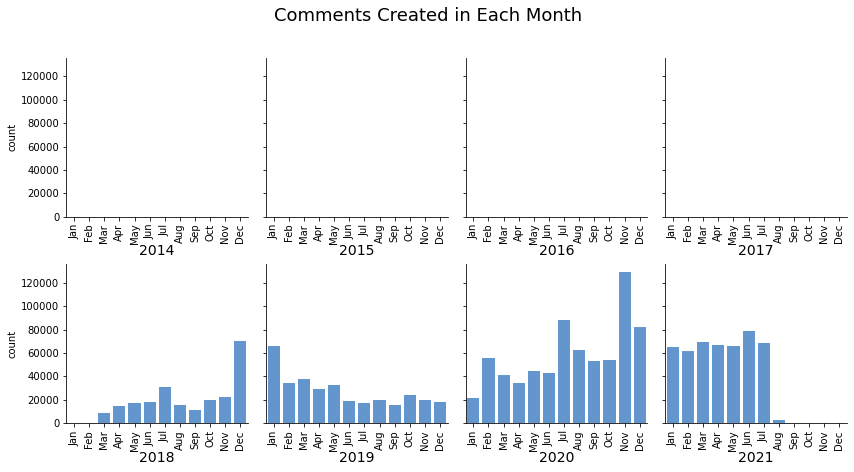

In [47]:
month_ord = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]
g = sb.FacetGrid(data=df_comments, col="year", col_wrap=4)
g.map(sb.countplot, "month", order=month_ord, palette=["#5296dd"])

g.set_xticklabels(rotation=90)
g.set_titles("{col_name}", size=14, y=-0.28)
g.fig.suptitle("Comments Created in Each Month", fontsize=18, y=1.06)

g.fig.subplots_adjust(wspace=0.1, hspace=0.3)
g.set_xlabels("")
for axis in g.axes.flat:
    axis.tick_params(labelbottom=True)

**NOTE:**
- 2018 Peaks --> Dec
- 2019 Peaks --> Jan
- 2020 Peaks --> Nov, Jul
- 2021 Peaks --> Jun

<a id='all_days'></a>
>>### Comments Created in Each Day
> <ul>
 <li><a href="#all_years">Comments Created in Each Year</a></li>
 <li><a href="#all_months">Comments Created in Each Month</a></li>
 <li><a href="#all_days"><b>Comments Created in Each Day</b></a></li>
 <li><a href="#2018_days">Comments Created in Each Day of 2018</a></li>
 <li><a href="#2019_days">Comments Created in Each Day of 2019</a></li>
 <li><a href="#2020_days">Comments Created in Each Day of 2020</a></li>
 <li><a href="#2021_days">Comments Created in Each Day of 2021</a></li>
 </ul>

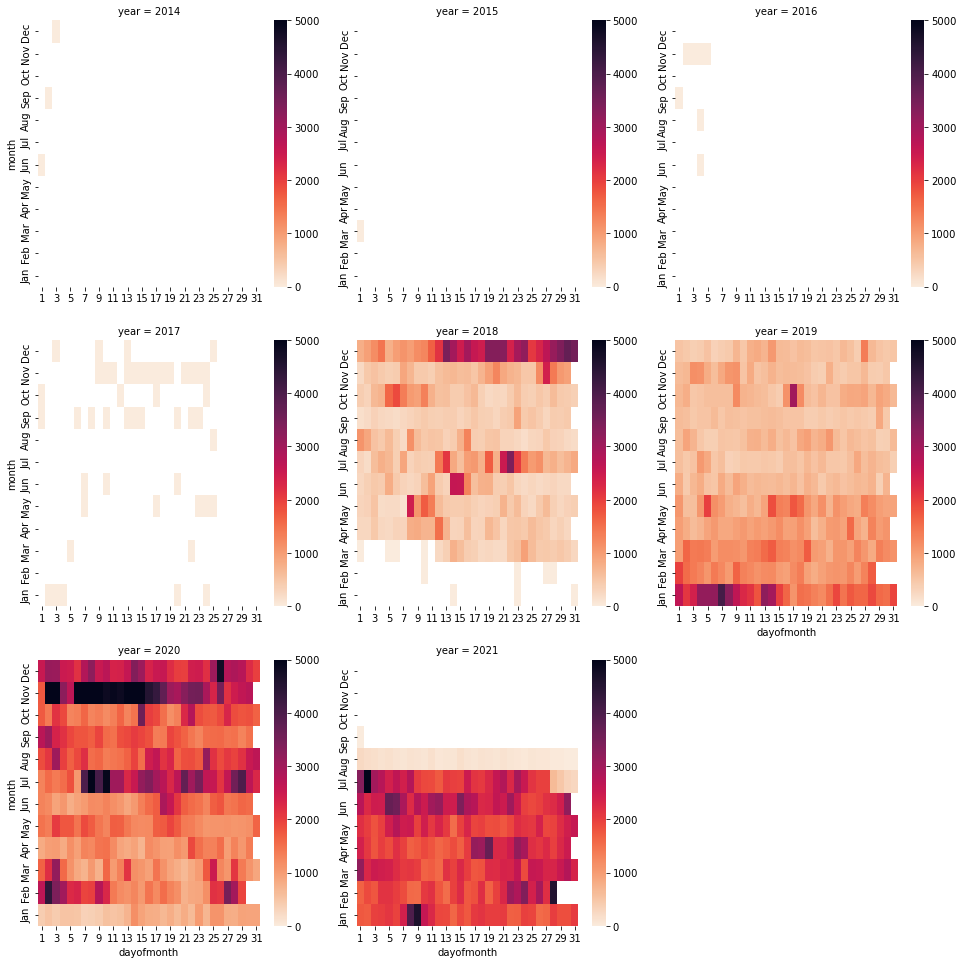

In [48]:
daily_counts = df_comments.groupby(['year', 'dayofmonth', 'month']).size().reset_index(name='count')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    d = d.reindex(index=months[::-1])
    sb.heatmap(d, **kwargs)

g = sb.FacetGrid(daily_counts, col='year', col_wrap=3, height=4.5)
g.map_dataframe(draw_heatmap, 'dayofmonth', 'month', 'count', cmap='rocket_r', vmin=0, vmax=5000);

g.fig.subplots_adjust(wspace=0.15, hspace=0.2)
for axis in g.axes.flat:
    axis.tick_params(labelbottom=True, labelleft=True)

In [49]:
# d = daily_counts[daily_counts.year==2020].pivot(index='month', columns='dayofmonth', values='count')
# d

In [50]:
# d = d.reindex(index=months[::-1])
# d

In [51]:
df_comments_18 = df_comments[df_comments["year"] == 2018]
df_comments_19 = df_comments[df_comments["year"] == 2019]
df_comments_20 = df_comments[df_comments["year"] == 2020]
df_comments_21 = df_comments[df_comments["year"] == 2021]

<a id='2018_days'></a>
>>### Comments Created in Each Day of 2018
> <ul>
 <li><a href="#all_years">Comments Created in Each Year</a></li>
 <li><a href="#all_months">Comments Created in Each Month</a></li>
 <li><a href="#all_days">Comments Created in Each Day</a></li>
 <li><a href="#2018_days"><b>Comments Created in Each Day of 2018</b></a></li>
 <li><a href="#2019_days">Comments Created in Each Day of 2019</a></li>
 <li><a href="#2020_days">Comments Created in Each Day of 2020</a></li>
 <li><a href="#2021_days">Comments Created in Each Day of 2021</a></li>
 </ul>

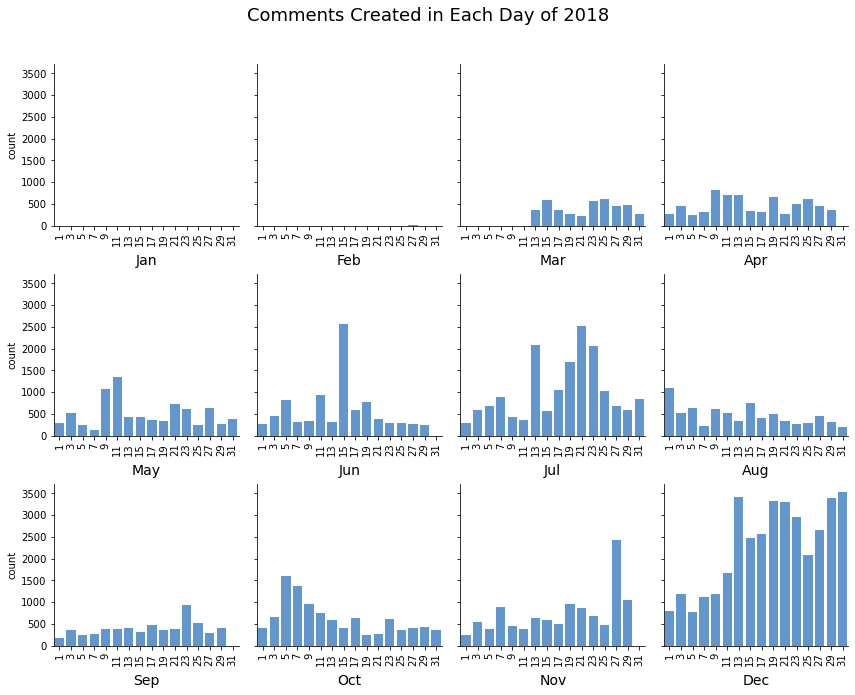

In [52]:
facet_days(df_comments_18, "2018")

**NOTE:** 
- The peak on Jun 15, 2018
- The peaks in Jul 2018
- The peak on Nov 27, 2018
- The peaks in Dec 2018

<a id='2019_days'></a>
>>### Comments Created in Each Day of 2019
> <ul>
 <li><a href="#all_years">Comments Created in Each Year</a></li>
 <li><a href="#all_months">Comments Created in Each Month</a></li>
 <li><a href="#all_days">Comments Created in Each Day</a></li>
 <li><a href="#2018_days">Comments Created in Each Day of 2018</a></li>
 <li><a href="#2019_days"><b>Comments Created in Each Day of 2019</b></a></li>
 <li><a href="#2020_days">Comments Created in Each Day of 2020</a></li>
 <li><a href="#2021_days">Comments Created in Each Day of 2021</a></li>
 </ul>

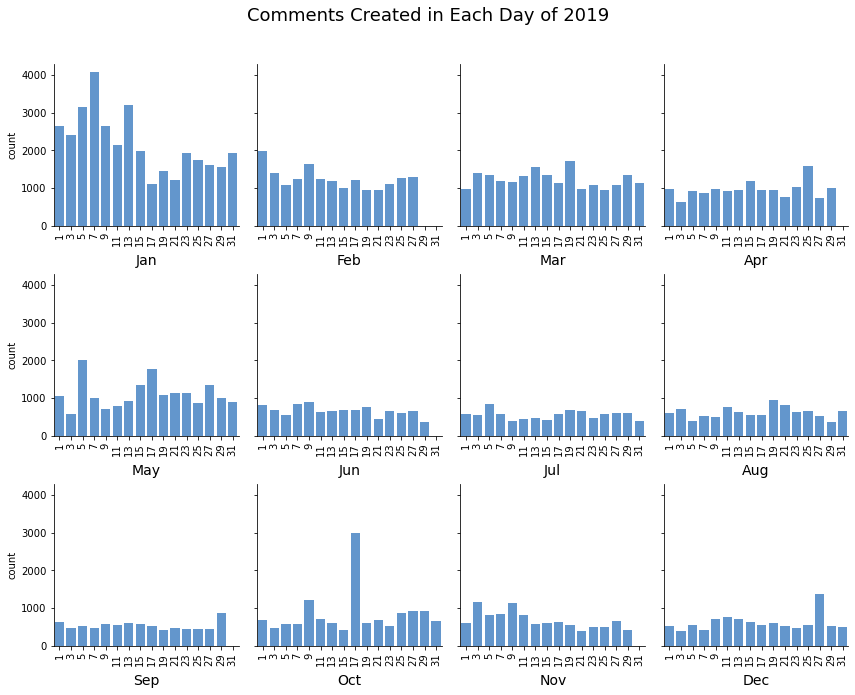

In [53]:
facet_days(df_comments_19, "2019")

**NOTE:** 
- The peaks on Jan 2019
- The peak on Oct 17, 2019

<a id='2020_days'></a>
>>### Comments Created in Each Day of 2020
> <ul>
 <li><a href="#all_years">Comments Created in Each Year</a></li>
 <li><a href="#all_months">Comments Created in Each Month</a></li>
 <li><a href="#all_days">Comments Created in Each Day</a></li>
 <li><a href="#2018_days">Comments Created in Each Day of 2018</a></li>
 <li><a href="#2019_days">Comments Created in Each Day of 2019</a></li>
 <li><a href="#2020_days"><b>Comments Created in Each Day of 2020</b></a></li>
 <li><a href="#2021_days">Comments Created in Each Day of 2021</a></li>
 </ul>

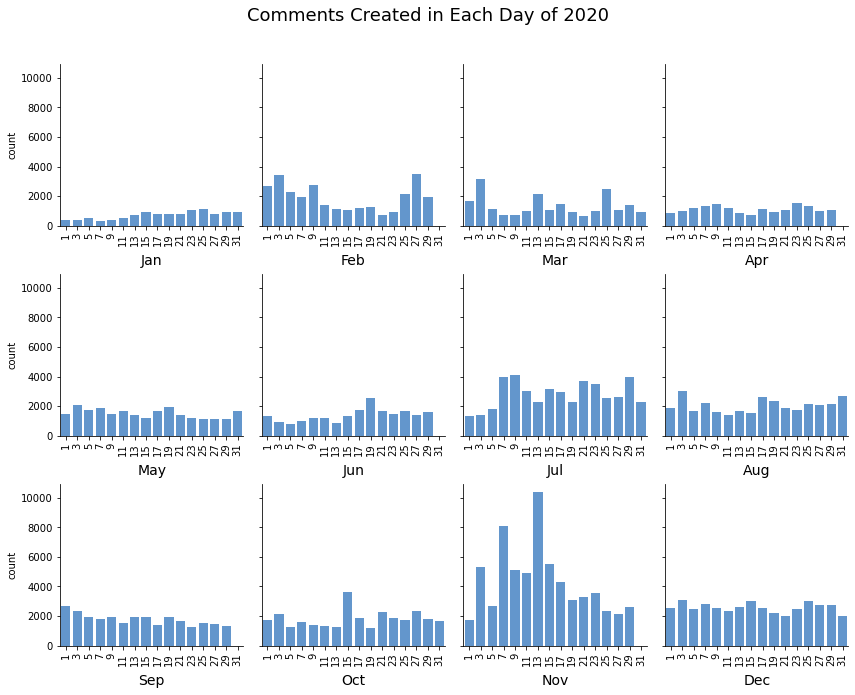

In [54]:
facet_days(df_comments_20, "2020")

**NOTE:** 
- 13 November is a peak in 2020

<a id='2021_days'></a>
>>### Comments Created in Each Day of 2021
> <ul>
 <li><a href="#all_years">Comments Created in Each Year</a></li>
 <li><a href="#all_months">Comments Created in Each Month</a></li>
 <li><a href="#all_days">Comments Created in Each Day</a></li>
 <li><a href="#2018_days">Comments Created in Each Day of 2018</a></li>
 <li><a href="#2019_days">Comments Created in Each Day of 2019</a></li>
 <li><a href="#2020_days">Comments Created in Each Day of 2020</a></li>
 <li><a href="#2021_days"><b>Comments Created in Each Day of 2021</b></a></li>
 </ul>

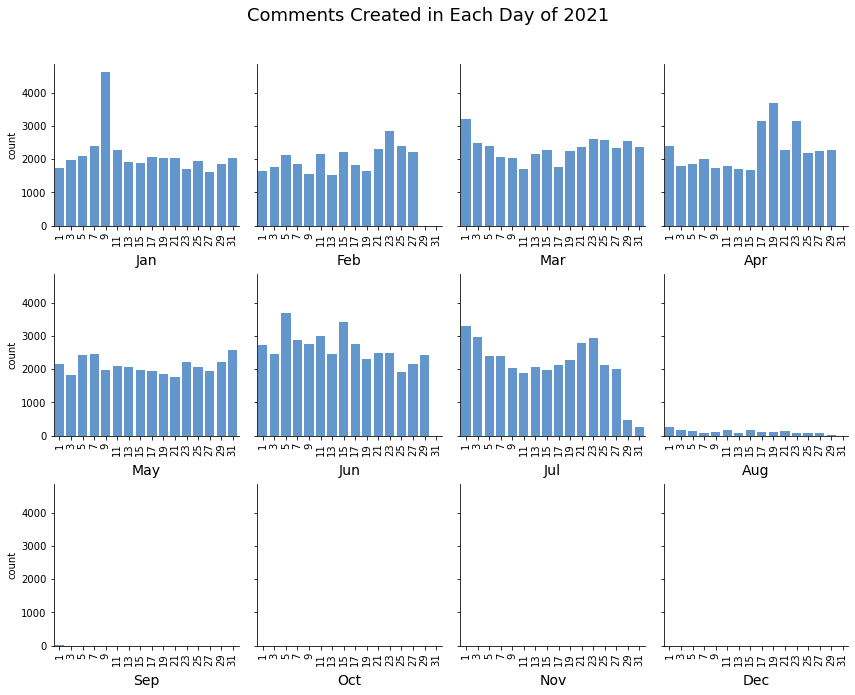

In [55]:
facet_days(df_comments_21, "2021")

**NOTE:** 
- The peak on Jan 9, 2021

<a id='peaks'></a>
>## Investigate Peaks
> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks"><b>Investigate Peaks</b></a></li>
 <li><a href="#top_peaks">Comments on Peak Days</a></li>
 <li><a href="#top_hours">Comments on Peak Hours</a></li>
 <li><a href="#top_times">Comments on Peak Times</a></li> 
 </ul>

In [56]:
# Create a data frame with the number of comments in each date
df_ncomments = df_comments.groupby(['date']).agg({'message':'count', 'n_replies': 'sum', 'n_likes': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df_ncomments["date"] = pd.to_datetime(df_ncomments["date"])
df_ncomments.head(15)


,date,n_comments,n_replies,n_likes
1047,2020-11-13,10407,5020.0,155110.0
1036,2020-11-02,8659,4083.0,83069.0
1041,2020-11-07,8123,2890.0,82691.0
1048,2020-11-14,6086,1138.0,51965.0
919,2020-07-08,6068,2263.0,74994.0
1278,2021-07-02,5767,1764.0,85995.0
1049,2020-11-15,5551,1254.0,54036.0
1037,2020-11-03,5303,1324.0,55976.0
1042,2020-11-08,5130,960.0,28951.0
1043,2020-11-09,5101,1263.0,37681.0


<a id='all'></a>
>>### Peaks in All Years
> <ul>
 <li><a href="#all"><b>All Years</b></a></li>
 <li><a href="#2018">2018</a></li>
 <li><a href="#2019">2019</a></li>
 <li><a href="#2020">2020</a></li>
 <li><a href="#2021">2021</a></li>
 </ul>

In [57]:
# filter on dates with peaks
df_peaks = df_ncomments[['date', 'n_comments']]
df_peaks_18 = df_peaks[df_peaks.date.dt.year == 2018]
df_peaks_19 = df_peaks[df_peaks.date.dt.year == 2019]
df_peaks_20 = df_peaks[df_peaks.date.dt.year == 2020]
df_peaks_21 = df_peaks[df_peaks.date.dt.year == 2021]

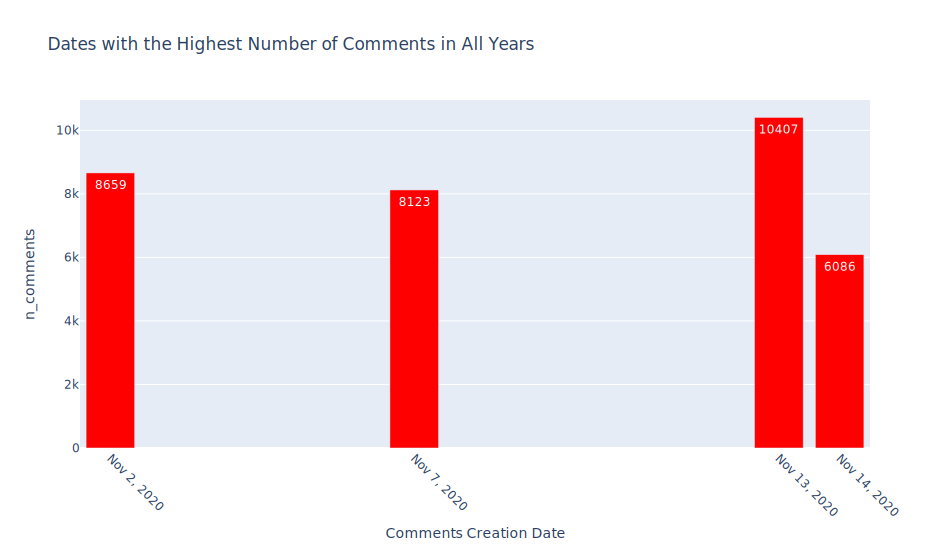

In [58]:
bar_peaks(df_peaks.head(4), "Dates with the Highest Number of Comments in All Years")

**NOTE:**
- 2018 Peaks --> Dec
- 2019 Peaks --> Jan
- 2020 Peaks --> Nov, Jul

In [59]:
df_dec_18 = df_ncomments[
    (df_ncomments["date"].dt.year == 2018) & (df_ncomments["date"].dt.month == 12)
]
df_jan_19 = df_ncomments[
    (df_ncomments["date"].dt.year == 2019) & (df_ncomments["date"].dt.month == 1)
]
df_nov_20 = df_ncomments[
    (df_ncomments["date"].dt.year == 2020) & (df_ncomments["date"].dt.month == 11)
]
df_jul_20 = df_ncomments[
    (df_ncomments["date"].dt.year == 2020) & (df_ncomments["date"].dt.month == 7)
]

<a id='2018'></a>
>>### 2018 Peaks
> <ul>
 <li><a href="#all">All Years</a></li>
 <li><a href="#2018"><b>2018</b></a></li>
 <li><a href="#2019">2019</a></li>
 <li><a href="#2020">2020</a></li>
 <li><a href="#2021">2021</a></li>
 </ul>

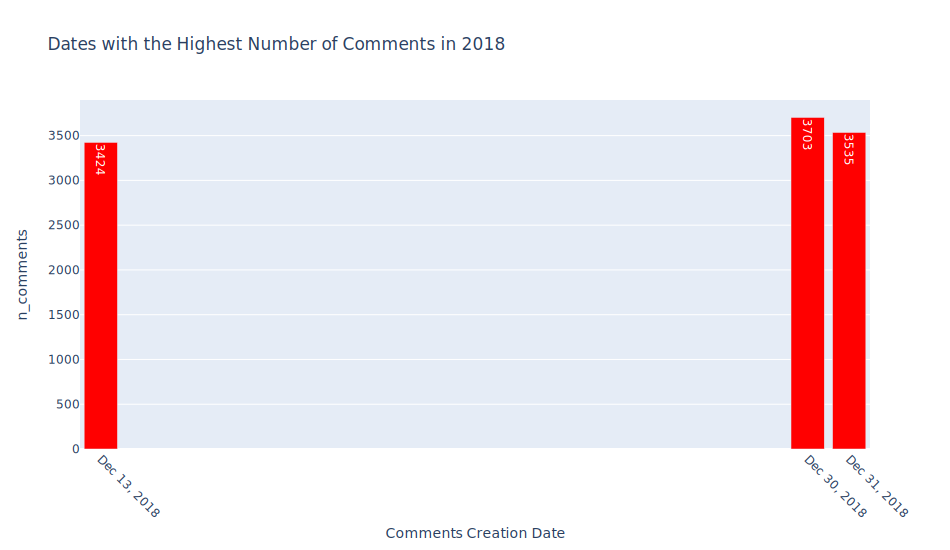

In [60]:
bar_peaks(df_peaks_18.head(3), "Dates with the Highest Number of Comments in 2018")

In [61]:
def bar_dates(df, title, threshold=float("inf")):
    fig = px.bar(df, x="date", y="n_comments", text="n_comments")

    fig.update_layout(
        title={"text": title, "x": 0.5, "xanchor": "center", "yanchor": "top"}
    )
    fig.update_layout(xaxis=dict(title="Comments Creation Date", tickmode="linear"))

    clrs = ["red" if (y > threshold) else "#5296dd" for y in df["n_comments"]]
    fig.update_traces(
        marker_color=clrs, marker_line_width=1.5, opacity=1, textposition="auto"
    )
    fig.update_xaxes(tickangle=45)
    fig.show("svg")

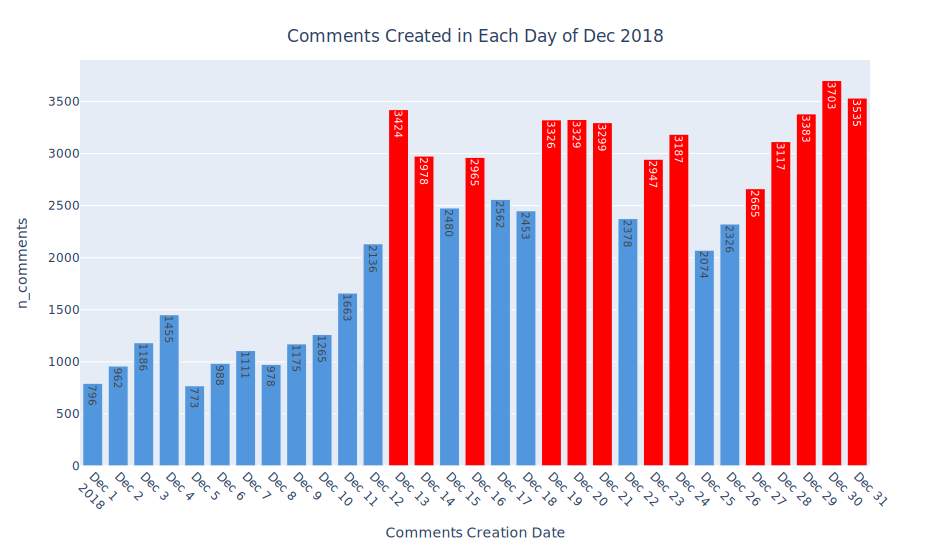

In [62]:
bar_dates(df_dec_18, "Comments Created in Each Day of Dec 2018", 2600)

<a id='2019'></a>
>>### 2019 Peaks
> <ul>
 <li><a href="#all">All Years</a></li>
 <li><a href="#2018">2018</a></li>
 <li><a href="#2019"><b>2019</b></a></li>
 <li><a href="#2020">2020</a></li>
 <li><a href="#2021">2021</a></li>
 </ul>

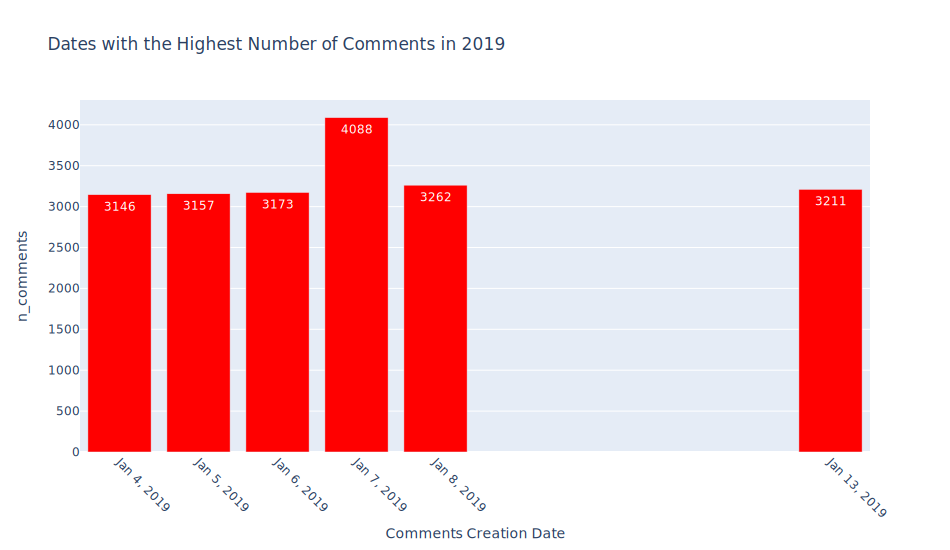

In [63]:
bar_peaks(df_peaks_19.head(6), "Dates with the Highest Number of Comments in 2019")

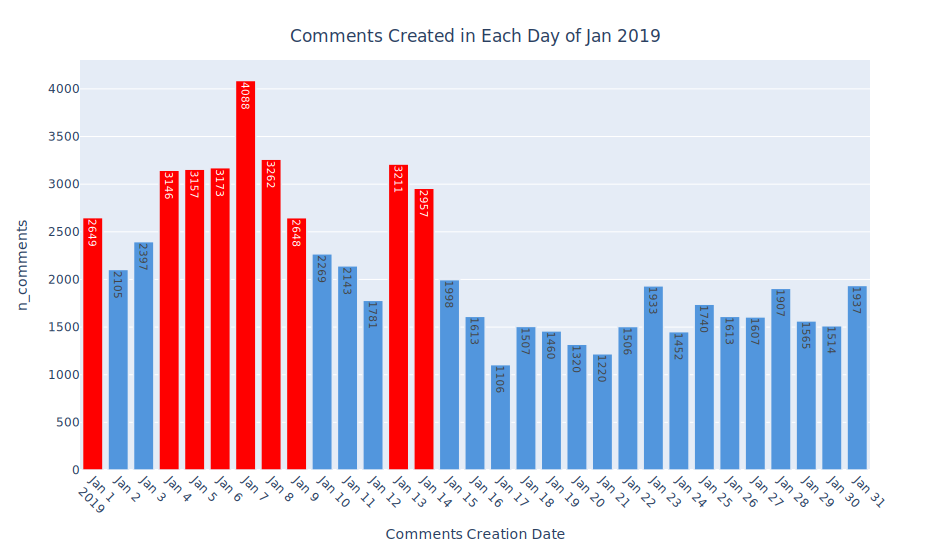

In [64]:
bar_dates(df_jan_19, "Comments Created in Each Day of Jan 2019", 2600)

<a id='2020'></a>
>>### 2020 Peaks
> <ul>
 <li><a href="#all">All Years</a></li>
 <li><a href="#2018">2018</a></li>
 <li><a href="#2019">2019</a></li>
 <li><a href="#2020"><b>2020</b></a></li>
 <li><a href="#2021">2021</a></li>
 </ul>

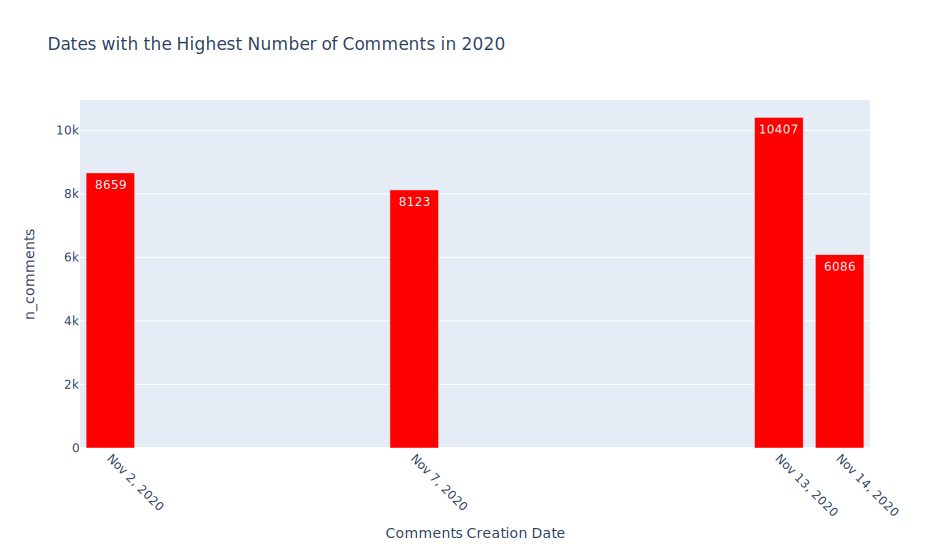

In [65]:
bar_peaks(df_peaks_20.head(4), "Dates with the Highest Number of Comments in 2020")

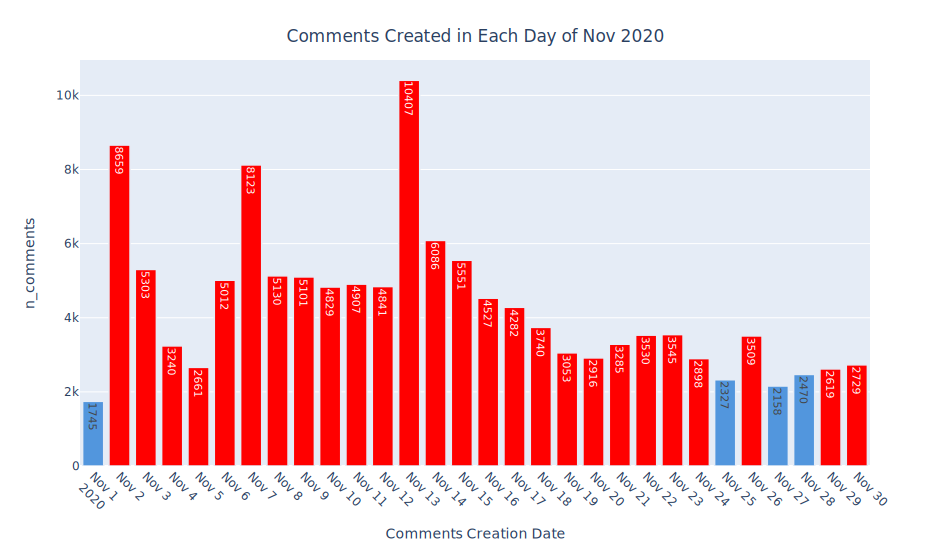

In [66]:
bar_dates(df_nov_20, "Comments Created in Each Day of Nov 2020", 2600)

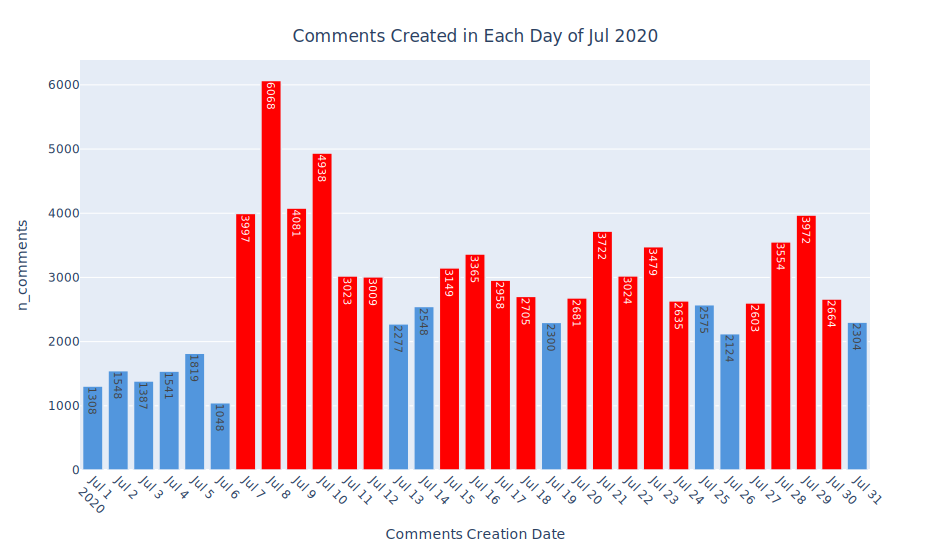

In [67]:
bar_dates(df_jul_20, "Comments Created in Each Day of Jul 2020", 2600)

<a id='2021'></a>
>>### 2021 Peaks
> <ul>
 <li><a href="#all">All Years</a></li>
 <li><a href="#2018">2018</a></li>
 <li><a href="#2019">2019</a></li>
 <li><a href="#2020">2020</a></li>
 <li><a href="#2021"><b>2021</b></a></li>
 </ul>

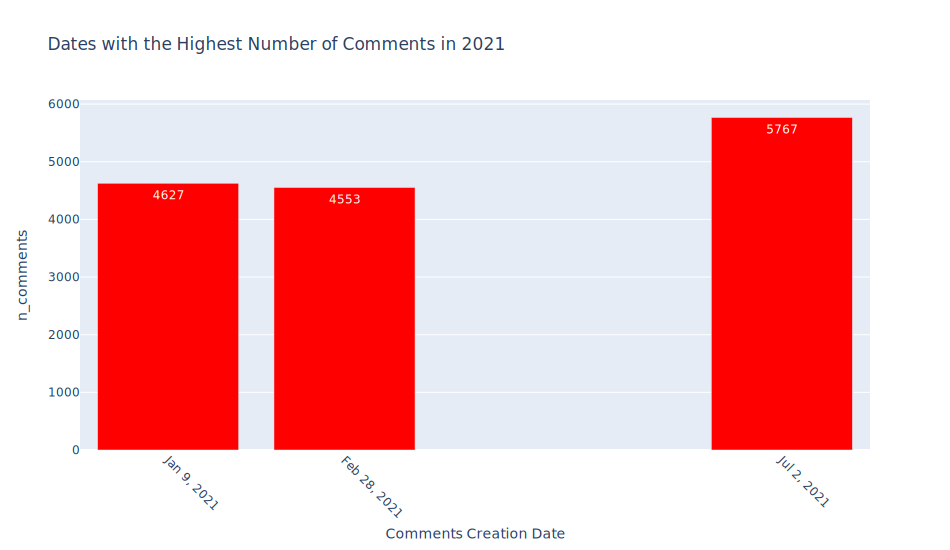

In [68]:
bar_peaks(df_peaks_21.head(3), "Dates with the Highest Number of Comments in 2021")

<a id='top_peaks'></a>
>## Comments on Peak Days
> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks">Investigate Peaks</a></li>
 <li><a href="#top_peaks"><b>Comments on Peak Days</b></a></li> 
 <li><a href="#top_hours">Comments on Peak Hours</a></li>
 <li><a href="#top_times">Comments on Peak Times</a></li> 
 </ul>

In [69]:
# Create an empty set of negatively commenting users
neg_users = set()

In [70]:
# Create an empty set of negative text
neg_text = set()

In [71]:
df_comments.head(1)

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour
0,#scarlettjohansson #alexandradaddario #emiliac...,2020-06-23 06:50:19,17915232430430980,0.0,0.0,2337634847974873088,n,3988263563,scarlettjohansonoffcial,False,https://www.instagram.com/scarlettjohansonoffcial,2020,Jun,23,2020-06-23,6


### Users with The Most Contributions on Each Date

In [72]:
df = df_comments.groupby(['date', 'username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

print("\nInvestigated --> These Users are Posting Normal Comments\n")
df.head(15)


Investigated --> These Users are Posting Normal Comments



,date,username,n_comments,n_likes,n_replies
709442,2020-08-24,sinasbutterfly,836,17.0,2.0
1168335,2021-06-05,anaww._.opi,359,20.0,0.0
1170715,2021-06-06,hasti._mm90,302,14.0,4.0
1169236,2021-06-05,maral_kp99,292,15.0,2.0
1171113,2021-06-06,maral_kp99,250,11.0,6.0
1168863,2021-06-05,hasti._mm90,215,9.0,1.0
1170141,2021-06-06,anaww._.opi,189,14.0,3.0
999503,2021-02-11,angel_amber__heard,183,200.0,0.0
162874,2018-12-24,missdanicosplay,175,166.0,3.0
1168735,2021-06-05,fateme.hoseinzadeh66,156,7.0,0.0


### Peak Dates

In [73]:
df_ncomments.head()

,date,n_comments,n_replies,n_likes
1047,2020-11-13,10407,5020.0,155110.0
1036,2020-11-02,8659,4083.0,83069.0
1041,2020-11-07,8123,2890.0,82691.0
1048,2020-11-14,6086,1138.0,51965.0
919,2020-07-08,6068,2263.0,74994.0


### 2020-11-13

In [74]:
df_comments[df_comments.datetime.dt.date.astype(str) == "2020-11-13"][
    "username"
].value_counts().head(10)

visannelutu             48
universe_.marvel        44
lks_ctm                 41
netos.k                 36
v4l3nt1nlol             30
becauseitsjohnnydepp    28
di22mendez              25
notdiko                 23
sonneterio              21
cris.chichenol          19
Name: username, dtype: int64

#### di22mendez   
<font color='red'>negative comments</font> | <font color='red'>newly created</font>
- Account created on FEBRUARY 6, 2021
- 12 posts
- 235 followers
- 5,163 following

In [75]:
neg_users = neg_users|{'di22mendez'}
neg_text = neg_text|{'remove amber', 'remove-amber', 'removed'}

In [76]:
df_comments.query("username == 'di22mendez'")['message'].value_counts().head(15)

@avilaricardoj https://www.change.org/p/dc-entertainment-remove-amber-heard-from-aquaman-2                       1
@soyjosebruges https://www.change.org/p/dc-entertainment-remove-amber-heard-from-aquaman-2                       1
@_black_.myrram._ oks                                                                                            1
@lautaro.g.barrios https://www.change.org/p/dc-entertainment-remove-amber-heard-from-aquaman-2                   1
@gftg5062442 te lo paso jsjsjs 😂🕊                                                                                1
@galarz.ivan https://www.change.org/p/dc-entertainment-remove-amber-heard-from-aquaman-2                         1
@josh_emef aah, crei que decias que ya había ganado :)                                                           1
@josh_emef no ganó el juicio aún. johnny perdió contra un portal de noticias, no contra amber.                   1
@_mmaaxxii._ oks                                                                

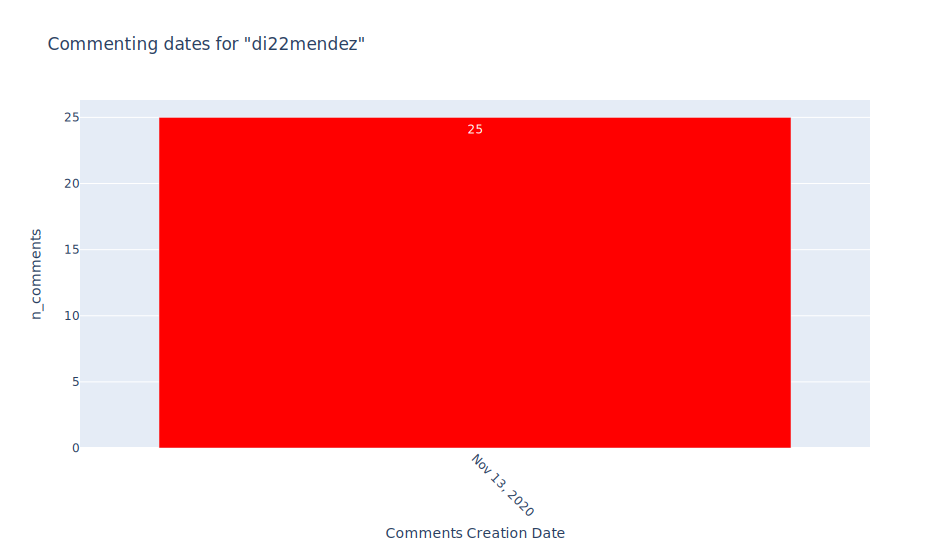

In [77]:
bar_peaks(get_top(df_comments[df_comments.username == "di22mendez"], 'date', 8, 'date', 'n_comments'),
         'Commenting dates for "di22mendez"')

#### becauseitsjohnnydepp  
<font color='red'>negative comments</font>

- first posted on Aug 23, 2016  
- has a total of 10,810 posts 
- 35.7k followers
- 1,968 following
- becauseitsjohnnydepp ^ created around September 2016

In [78]:
neg_users = neg_users|{'becauseitsjohnnydepp'}
neg_text = neg_text|{'justiceforjohnnydepp', 'amber lunge', 'assaulted johnny', 'amberheardisanabuser',
                     'clawing', 'tugging', 'aggressively pull', 'amber-heard-abus', 'amber heard abus', 
                     'amber-abus', 'amber abus'}

In [79]:
df_comments.query("username == 'becauseitsjohnnydepp'")['message'].value_counts().head(15)

#justiceforjohnnydepp                                                                                                                                                                                                                                                     55
#justiceforjohnnydepp https://www.change.org/p/the-people-warner-bros-bring-johnny-depp-back-as-gellert-grindelwald                                                                                                                                                       29
https://www.change.org/p/the-people-warner-bros-bring-johnny-depp-back-as-gellert-grindelwald #justiceforjohnnydepp                                                                                                                                                       28
#justiceforjohnnydepp https://meaww.com/johnny-depp-children-amber-heard-abusing-bahamas-actor-estate-manager                                                                                    

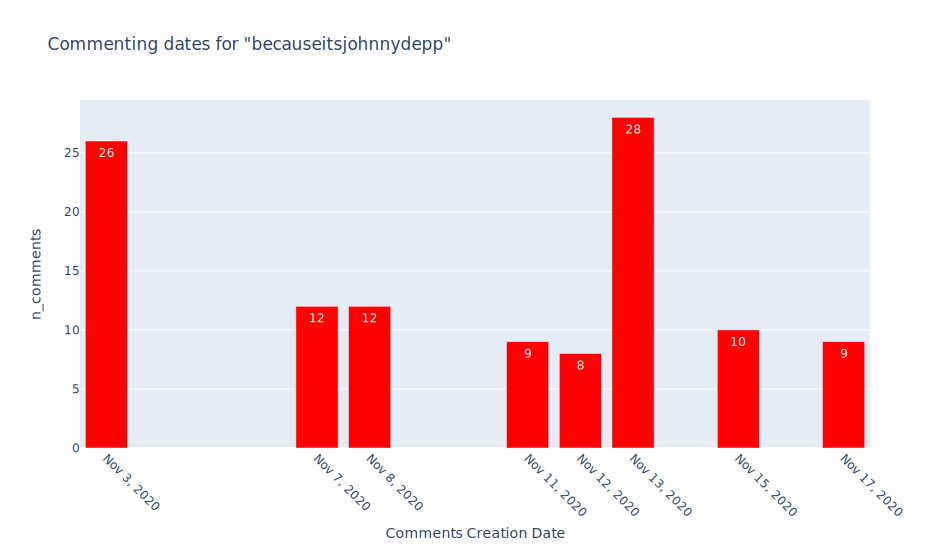

In [80]:
bar_peaks(get_top(df_comments[df_comments.username == "becauseitsjohnnydepp"], 'date', 8, 'date', 'n_comments'),
         'Commenting dates for "becauseitsjohnnydepp"')

In [81]:
df_comments[df_comments.datetime.dt.date.astype(str) == "2020-11-13"][
    "message"
].value_counts().head(20)

#justiceforjohnnydepp                                                                                                  221
❤️                                                                                                                      40
no                                                                                                                      37
😍                                                                                                                       23
#justiceforjohnnydepp https://www.change.org/p/the-people-warner-bros-bring-johnny-depp-back-as-gellert-grindelwald     22
love you                                                                                                                19
❤️❤️❤️                                                                                                                  18
😍😍😍                                                                                                                     17
#boycottaquaman2

### 2020-11-02
<font color='red'>Lots of negative comments can be seen on that date.</font>

In [82]:
df_comments[df_comments.datetime.dt.date.astype(str) == "2020-11-02"][
    "username"
].value_counts().head(10)

queenmusicvidoe      71
queenmusicvideo      60
_jas_min_pr._        37
babikate6            35
untilthenia          33
amirali.fitness2     33
saghar.ttmfar        32
academic_force       30
tom_hiddleston_ir    30
maryam_khaledi_77    30
Name: username, dtype: int64

#### tom_hiddleston_ir  
<font color='red'>negative comments</font> | <font color='red'>newly created</font>

- first posted on OCTOBER 26, 2020
- 148 posts
- 1,702 followers
- 664 following

In [83]:
neg_users = neg_users|{'tom_hiddleston_ir'}
neg_text = neg_text|{'amberheardisaliar', 'nojohnnynopotc', 'wearewhityoujohnnydepp'}

In [84]:
print('\nOnly Posting one Hashtag at a time!!\n')
df_comments.query("username == 'tom_hiddleston_ir'")['message'].value_counts().head(15)


Only Posting one Hashtag at a time!!



#nojohnnynopotc            8
#justiceforjohnnydepp      6
#amberheardisaliar         6
#fuckthesun                5
#wearewhityoujohnnydepp    5
Name: message, dtype: int64

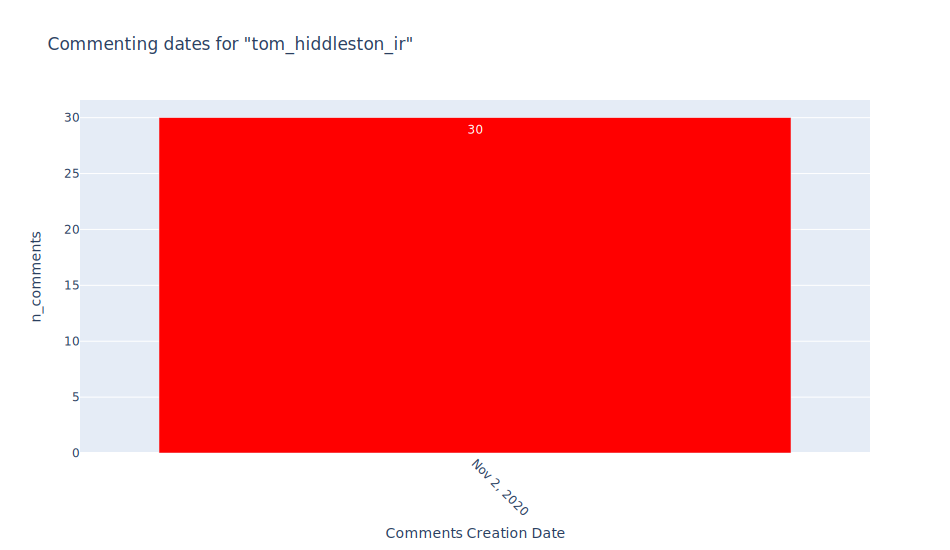

In [85]:
bar_peaks(get_top(df_comments[df_comments.username == "tom_hiddleston_ir"], 'date', 8, 'date', 'n_comments'),
         'Commenting dates for "tom_hiddleston_ir"')

#### queenmusicvidoe  
<font color='red'>negative comments</font>

- private account
- 0 posts
- 4 followers
- 403 following

In [86]:
neg_users = neg_users|{'queenmusicvidoe'}

In [87]:
print('\nAmplifying lots of Hashtags!!\n')
df_comments.query("username == 'queenmusicvidoe'")['message'].value_counts().head(15)


Amplifying lots of Hashtags!!



@johnnydepp #wearewithyoujohnnydepp #amberheardisaliar #justiceforjohnnydepp #wearewithyoujohnnydepp #johnnydepp #amberheard #fuckthesun                  24
@johnnydepp #wearewithyoujohnnydepp #amberheardisaliar #justiceforjohnnydepp #wearewithyoujohnnydepp #johnnydepp #amberheard #fuckthesun 💫                 3
@johnnydepp #wearewithyoujohnnydepp #amberheardisaliar #justiceforjohnnydepp #wearewithyoujohnnydepp #johnnydepp #amberheard #fuckthesun 💙                 3
@johnnydepp #wearewithyoujohnnydepp #amberheardisaliar #justiceforjohnnydepp #wearewithyoujohnnydepp #johnnydepp #amberheard #fuckthesun 💙💙💙💙              2
@johnnydepp #wearewithyoujohnnydepp #amberheardisaliar #justiceforjohnnydepp #wearewithyoujohnnydepp #johnnydepp #amberheard #fuckthesun ❤️❤️❤️❤️❤️        2
@johnnydepp #wearewithyoujohnnydepp #amberheardisaliar #justiceforjohnnydepp #wearewithyoujohnnydepp #johnnydepp #amberheard #fuckthesun 🧡🧡🧡🧡🧡             2
@johnnydepp #wearewithyoujohnnydepp #amberheardisaliar #ju

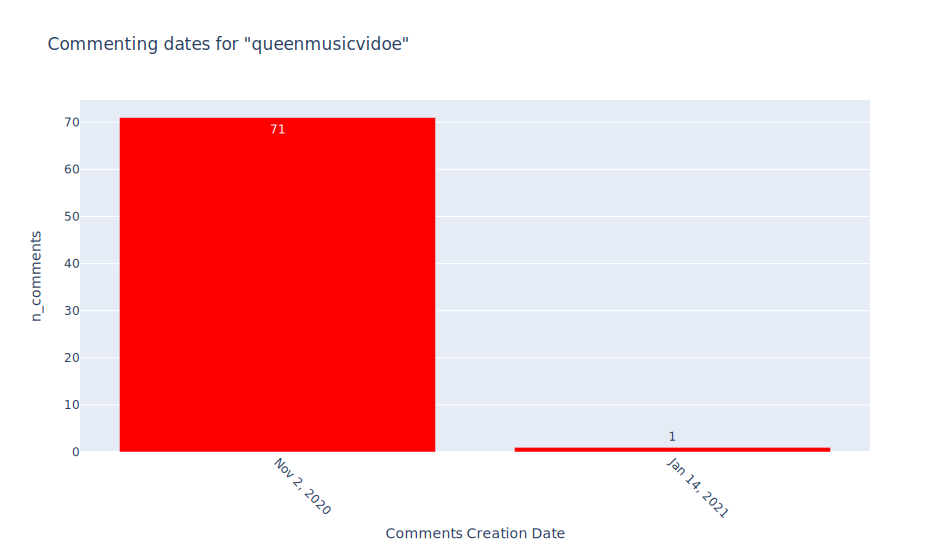

In [88]:
bar_peaks(get_top(df_comments[df_comments.username == "queenmusicvidoe"], 'date', 8, 'date', 'n_comments'),
         'Commenting dates for "queenmusicvidoe"')

#### maryam_khaledi_77  
<font color='red'>negative comments</font>

- private account
- 0 posts
- 282 followers
- 297 following

In [89]:
neg_users = neg_users|{'maryam_khaledi_77'}
neg_text = neg_text|{'amberturd', 'amberisanabuser', 'johnnydeppforever'}

In [90]:
df_comments.query("username == 'maryam_khaledi_77'")['message'].value_counts().head(15)

#justiceforjohnnydepp                                                                                                                                                                                           7
#amberturd                                                                                                                                                                                                      4
@amberheard 💩💩💩💩💩💩                                                                                                                                                                                              3
#wearewithyoujohnnydepp 💜                                                                                                                                                                                       2
#amberisanabuser                                                                                                                                                

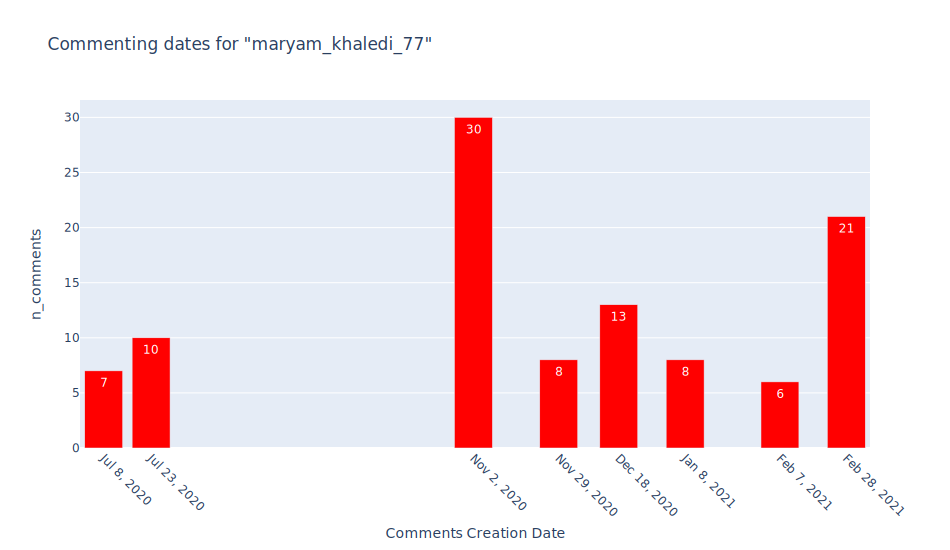

In [91]:
bar_peaks(get_top(df_comments[df_comments.username == "maryam_khaledi_77"], 'date', 8, 'date', 'n_comments'),
         'Commenting dates for "maryam_khaledi_77"')

#### _jas_min_pr._
<font color='red'>negative comments</font>

- private account
- 0 posts
- 143 followers
- 266 following

In [92]:
neg_users = neg_users|{'_jas_min_pr._'}

In [93]:
df_comments.query("username == '_jas_min_pr._'")['message'].value_counts().head(15)

@johnnydepp                                                                                                                                 18
@johnnydepp #wearewithyoujohnnydepp #amberheardisaliar #justiceforjohnnydepp #wearewithyoujohnnydepp #johnnydepp #amberheard #fuckthesun     9
#wearewithyoujohnnydepp                                                                                                                      4
😍😍                                                                                                                                           1
❤️🔥                                                                                                                                          1
💜💜                                                                                                                                           1
💛💜                                                                                                                                           1

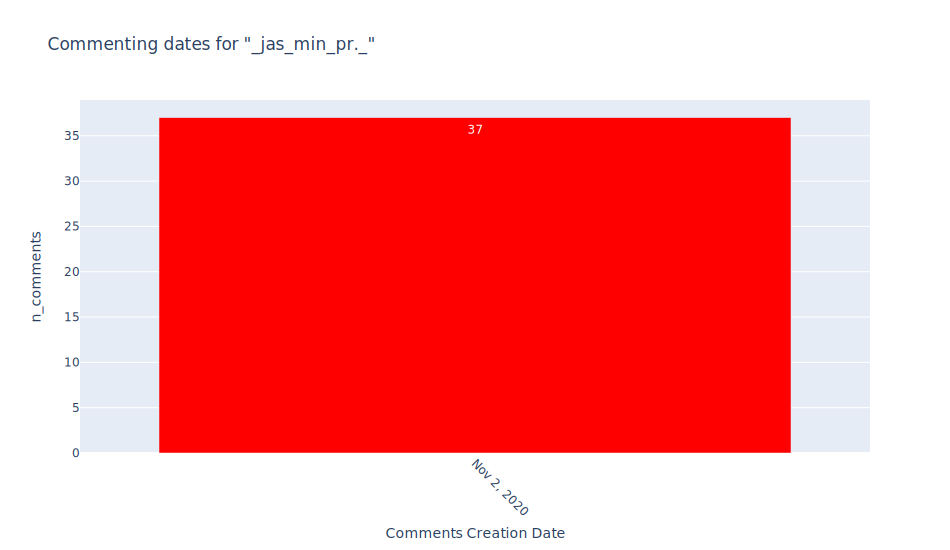

In [94]:
bar_peaks(get_top(df_comments[df_comments.username == "_jas_min_pr._"], 'date', 8, 'date', 'n_comments'),
         'Commenting dates for "_jas_min_pr._"')

#### babikate6
<font color='red'>negative comments</font>

- private account
- 0 posts
- 5 followers
- 21 following

In [95]:
neg_users = neg_users|{'babikate6'}

In [96]:
df_comments.query("username == 'babikate6'")['message'].value_counts().head(15)

@johnnydepp #wearewithyoujohnnydepp #amberheardisaliar #justiceforjohnnydepp #wearewithyoujohnnydepp #johnnydepp #amberheard                                                                                                                                                         9
@johnnydepp #wearewithyoujohnnydepp #amberheardisaliar #justiceforjohnnydepp #wearewithyoujohnnydepp #johnnydepp #amberheard #fuckthesun                                                                                                                                             5
@johnnydepp #wearewithyoujohnnydepp #amberheardisaliar #justiceforjohnnydepp #wearewithyoujohnnydepp #johnnydepp #amberheard #fuckthesun ♥️                                                                                                                                          5
@johnnydepp #wearewithyoujohnnydepp #amberheardisaliar #justiceforjohnnydepp #wearewithyoujohnnydepp #johnnydepp #amberheard #fuckthesun 🗡️                        

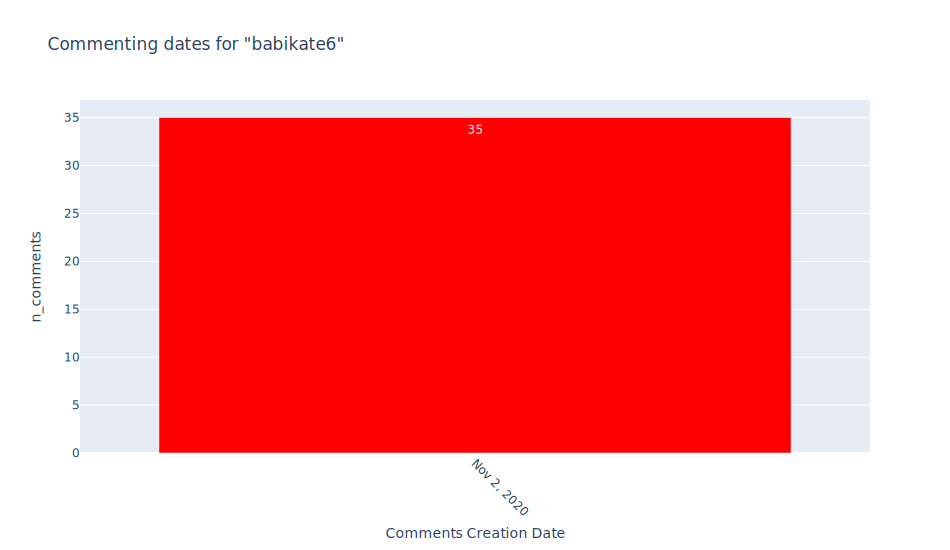

In [97]:
bar_peaks(get_top(df_comments[df_comments.username == "babikate6"], 'date', 8, 'date', 'n_comments'),
         'Commenting dates for "babikate6"')

In [98]:
df_comments[df_comments.datetime.dt.date.astype(str) == "2020-11-02"][
    "message"
].value_counts().head(20)

@johnnydepp #wearewithyoujohnnydepp #amberheardisaliar #justiceforjohnnydepp #wearewithyoujohnnydepp #johnnydepp #amberheard #fuckthesun    119
#justiceforjohnnydepp                                                                                                                        82
@johnnydepp                                                                                                                                  80
#wearewithyoujohnnydepp                                                                                                                      35
😍                                                                                                                                            21
❤️❤️❤️                                                                                                                                       20
🔥                                                                                                                                       

### 2020-11-07
<font color='red'>Lots of negative comments can be seen on that date.</font>

In [99]:
df_comments[df_comments.datetime.dt.date.astype(str) == "2020-11-07"][
    "username"
].value_counts().head(10)

azulj.nolasco               51
cinemaporteghal             43
glory_cinema                41
sassything90                23
11_ornella_06               20
olvorka                     18
vengadorunavezvengador      18
theworldofgeeks99up         18
slut_for_big_juicy_tacos    17
samanthastar53              16
Name: username, dtype: int64

#### samanthastar53
<font color='red'>negative comments</font> | <font color='red'>newly created</font>

- Account created on NOVEMBER 5, 2020
- 5 posts
- 34 followers
- 102 following

https://www.instagram.com/p/CKXKaGEMOK8/?utm_source=ig_web_copy_link

In [100]:
neg_users = neg_users|{'samanthastar53'}
neg_text = neg_text|{'amberheardisanabuserandliar', 'boycottamberheard', 
                     'removeamberheardsfromaquaman2', 'jailforamberheard'}

In [101]:
df_comments.query("username == 'samanthastar53'")['message'].value_counts().head(15)

#removeamberheardsfromaquaman2      42
#boycottamberheard                  27
#amberheardisanabuserandliar        23
#jailforamberheard                  11
#justiseforjohnnydepp                9
@amberheard 🤮🤮🤮🤮🤮🤮                   9
#amberturd 💩                         8
🤮🤮🤮🤮🤮🤮🤮                              7
#boycottamberheard 🤢                 7
@amberheard 🤮🤮🤮🤮🤮🤮🤮                  7
@amberheard 💩💩💩💩💩💩                   6
#removeamberheardsfromaquaman2 🤢     6
#amberheardisanabuserandliar 🤢       5
#jailforamberheard 🤢                 4
@amberheard 🤮🤮🤮🤮🤮                    4
Name: message, dtype: int64

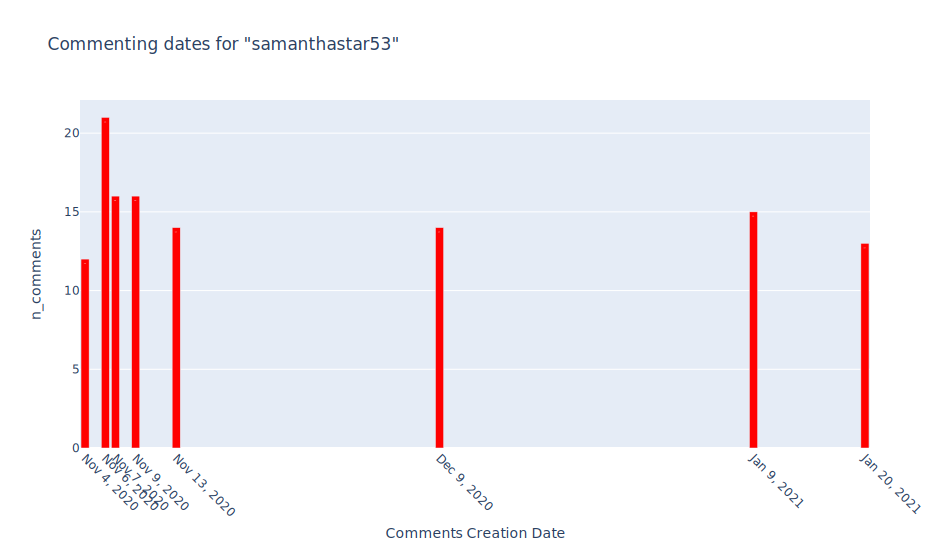

In [102]:
bar_peaks(get_top(df_comments[df_comments.username == "samanthastar53"], 'date', 8, 'date', 'n_comments'),
         'Commenting dates for "samanthastar53"')

#### slut_for_big_juicy_tacos
<font color='red'>negative comments</font>

- private account
- 4,643 posts
- 38 followers
- 2,277 following

Bio:  
Daddy Dylan
Not scared of any Bitch. This is my iconic spam. Wish I can be a duck shark or flying squirrel because why the hell not http://chng.it/ttWqDX5yVF


In [103]:
neg_users = neg_users|{'samanthastar53'}
neg_text = neg_text|{'die', 'burn in hell', 'piece of shit', 'jailforamberheard', 'she should kys',
                     'jail', 'diecunt', 'cunt', 'death'}

In [104]:
df_comments.query("username == 'slut_for_big_juicy_tacos'")['message'].value_counts().head(15)

die                                                   4
burn in hell                                          2
piece of shit                                         2
she should kys                                        2
cunt                                                  2
fuck this cunt                                        1
i feel like she will abuse the kid                    1
#justiceforjohnnydepp                                 1
fuck her she needs to go to jail                      1
worthless piece of shit                               1
get raped                                             1
#diecunt                                              1
i hope you get beaten to death                        1
go die                                                1
u kys too for supporting her knowing what she does    1
Name: message, dtype: int64

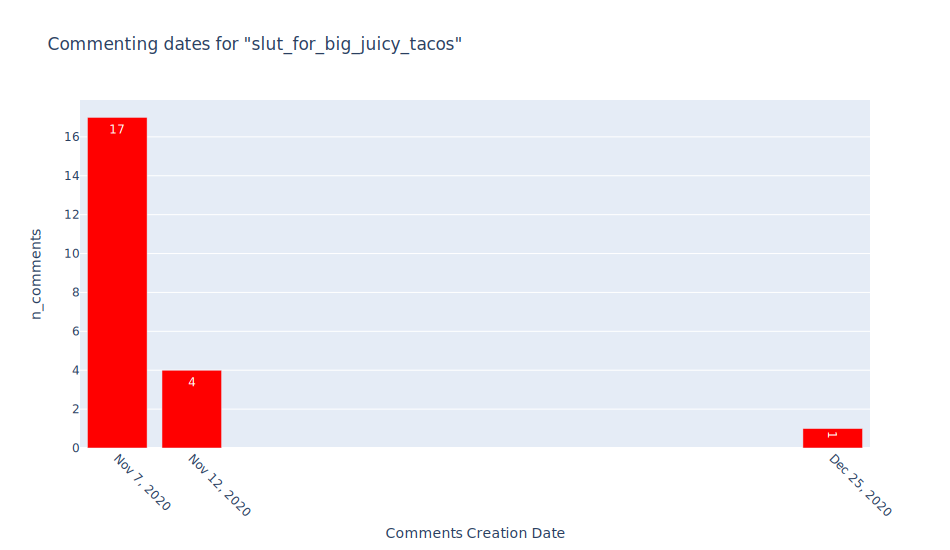

In [105]:
bar_peaks(get_top(df_comments[df_comments.username == "slut_for_big_juicy_tacos"], 'date', 8, 'date', 'n_comments'),
         'Commenting dates for "slut_for_big_juicy_tacos"')


#### theworldofgeeks99up
<font color='red'>negative comments</font> 

- 8,311 posts
- 45.3k followers
- 682 following

"@jasonjamie1998 which i don't want amber to be in aquaman 2 that would be cool i'd still go see it but her stupid ass is in it then i cannot at all pay to go watch it and since movie theaters are still not open i doubt i'm gonna pay to watch a movie in theaters again. "

In [106]:
neg_users = neg_users|{'theworldofgeeks99up'}
neg_text = neg_text|{'stupid ass', 'stupid'}

In [107]:
df_comments.query("username == 'theworldofgeeks99up'")['message'].value_counts().head(15)

wakanda                                                                                                                                                                                                                                                                         1
@bruh__mode yee.                                                                                                                                                                                                                                                                1
@d_man25 imagine superman still being single. 😅                                                                                                                                                                                                                                 1
@jasonjamie1998 aquaman 2 is gonna be in production soon.                                                                                                                         

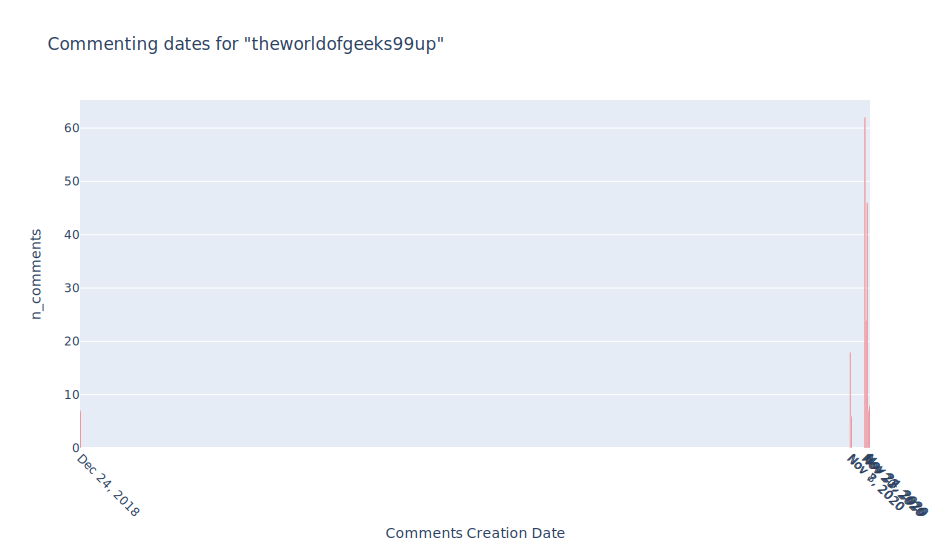

In [108]:
bar_peaks(get_top(df_comments[df_comments.username == "theworldofgeeks99up"], 'date', 8, 'date', 'n_comments'),
         'Commenting dates for "theworldofgeeks99up"')

#### olvorka
<font color='red'>negative comments</font> | <font color='red'>newly created</font>

- Account created on JUNE 4, 2021
- 3 posts
- 197 followers
- 83 following

In [109]:
neg_users = neg_users|{'olvorka'}

In [110]:
df_comments.query("username == 'olvorka'")['message'].value_counts().head(15)

#justiceforjohnnydepp    16
amber stupid abuser       1
🐁🐁🐁🐁🐁🐁🐁🐁🐁🐁🐁🐁🐁🐁            1
Name: message, dtype: int64

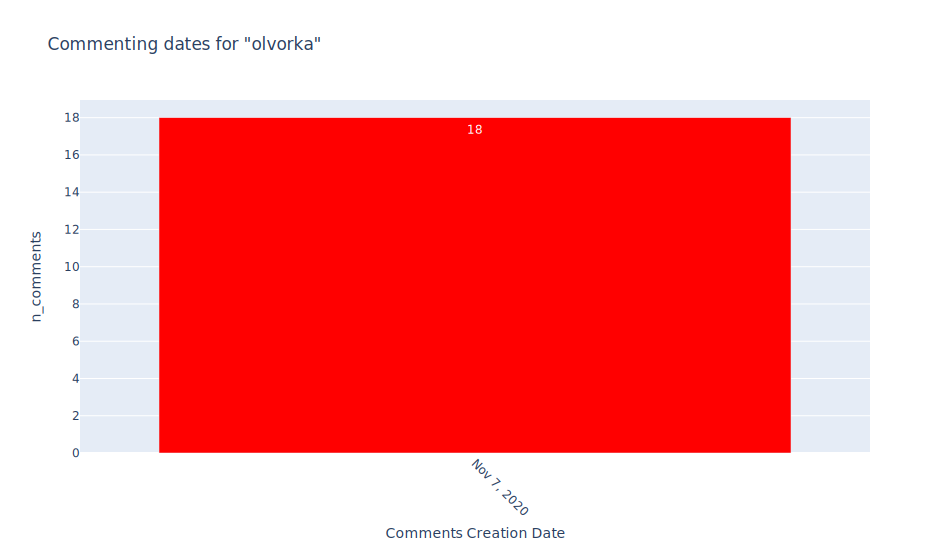

In [111]:
bar_peaks(get_top(df_comments[df_comments.username == "olvorka"], 'date', 8, 'date', 'n_comments'),
         'Commenting dates for "olvorka"')

#### sassything90
<font color='red'>negative comments</font>  

- Private Account
- 632 posts
- 357 followers
- 924 following

In [112]:
neg_users = neg_users|{'sassything90'}
neg_text = neg_text|{'gold digger', 'abusing', 'abuser', 'abuse', 'clown', 
                     'justice for johnny', 'how can you still have fans'}

In [113]:
df_comments.query("username == 'sassything90'")['message'].value_counts().head(15)

🤢🤮                                                                                                                                                            3
#justiceforjohnnydepp                                                                                                                                         1
you look like you were up all night abusing, johnny depp!                                                                                                     1
🤢🤮🤢🤮                                                                                                                                                          1
i hope you lose your career                                                                                                                                   1
gold digger!                                                                                                                                                  1
no titts! 🤢🤮🤡                           

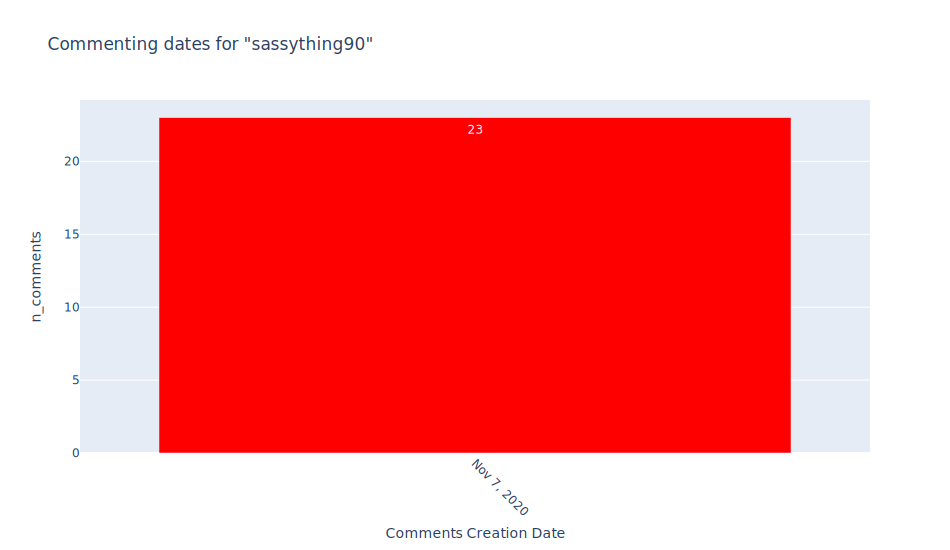

In [114]:
bar_peaks(get_top(df_comments[df_comments.username == "sassything90"], 'date', 8, 'date', 'n_comments'),
         'Commenting dates for "sassything90"')

#### azulj.nolasco
<font color='red'>negative comments</font>  

- azuljulieta.nolasco
- 0 posts
- 2 followers
- 1 following

In [115]:
neg_users = neg_users|{'azulj.nolasco'}

In [116]:
df_comments.query("username == 'azulj.nolasco'")['message'].value_counts().head(15)

#justiceforjohnnydepp              21
🖕                                   5
🤡🤮💩                                 3
🤮🤮🤮🤮                                2
💩                                   2
🤡🤡🤡                                 2
💩💩💩                                 1
🤡🤡                                  1
🤮🤮🤮                                 1
🤮🤮                                  1
🤡🤡🤡🤡🤮🤮🤮🤮🤮🤮🤡🤡🤡🤮🤮🤮🤮🤮🤮🤡🤡🤡🤮🤮🤮🤡🤡🤡🤮🤮🤮     1
🤡💩🤮                                 1
🤡                                   1
🖕🖕🖕🖕🖕💩💩💩🤮                           1
🤮                                   1
Name: message, dtype: int64

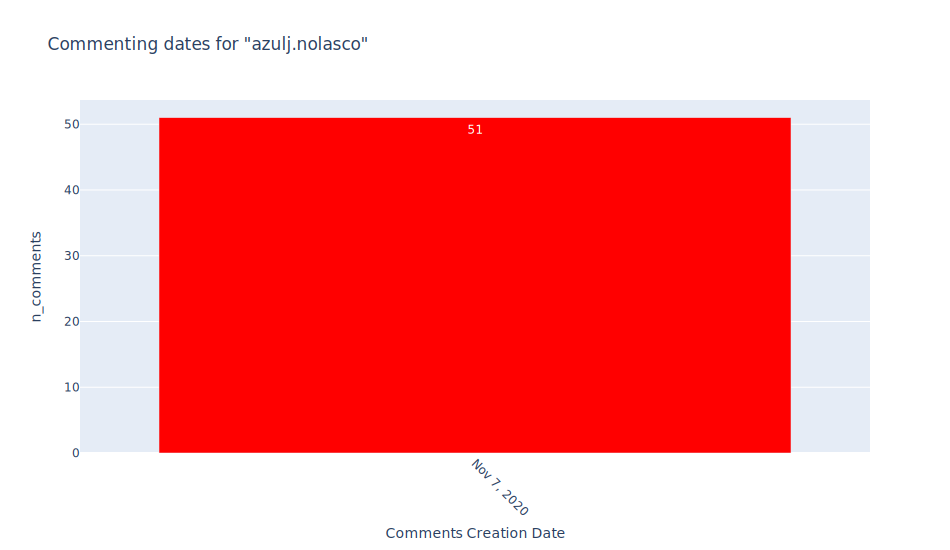

In [117]:
bar_peaks(get_top(df_comments[df_comments.username == "azulj.nolasco"], 'date', 8, 'date', 'n_comments'),
         'Commenting dates for "azulj.nolasco"')

In [118]:
df_comments[df_comments.datetime.dt.date.astype(str) == "2020-11-07"][
    "message"
].value_counts().head(20)

#justiceforjohnnydepp                                                                                                                                                     307
ضد                                                                                                                                                                         89
❤️                                                                                                                                                                         26
😍                                                                                                                                                                          23
😢                                                                                                                                                                          21
:(                                                                                                                                

### 2020-11-14

In [119]:
df_comments[df_comments.datetime.dt.date.astype(str) == "2020-11-14"][
    "username"
].value_counts().head(10)

hero_doe              27
maikstrange           19
engenhariadocinema    18
mouhoubiabdelghani    15
nathanjackson389      15
theweeknd_avakin      14
dushyant_386          13
dc_geeks              13
kinoholiczka          12
marcelitovalle        12
Name: username, dtype: int64

#### theweeknd_avakin
<font color='red'>negative comments</font> | <font color='red'>newly created</font>
- Account created on DECEMBER 4, 2020
- 97 posts
- 3,166 followers
- 7,105 following

"she's not a good actress either lmao 😂 she's never been nominated for shit"

In [120]:
neg_users = neg_users|{'theweeknd_avakin'}
neg_text = neg_text|{'boycott', 'nominated for shit', 'shit', 'whorish', 'scammer', 'fake victim'}

In [121]:
df_comments.query("username == 'theweeknd_avakin'")['message'].value_counts().head(15)

@naveen_3275_ so you saying that  johnny depp getting fired from pirates of the caribbean 6 and fantastic beasts and where to find them 2 are alright but this isn't                                                                                                                                                                                                                                                                           1
@naveen_3275_ if you don't care about amber heard then stop her from being casted for the movie cuz what she deserves is being thrown in jail for playing the victim card and damaging johnny depp's career....and emelia is perfect for the role cuz she and jason was in game of thrones together as khal drogo and khaleesi denarys...and they're chemistry is more perfect than anything the abuser amber turd can put onto the screen.    1
@bridge5306 strong woman......😂 more like a whorish scammer who played the fake victim and tried to destroy the one and only mf johnny

In [122]:
df_comments[df_comments.datetime.dt.date.astype(str) == "2020-11-14"][
    "message"
].value_counts().head(20)

#justiceforjohnnydepp                                                                                                                                                                                                                                                            67
❤️                                                                                                                                                                                                                                                                               22
❤️❤️❤️                                                                                                                                                                                                                                                                           21
😍                                                                                                                                                                           

<a id='top_hours'></a>
>## Comments on Peak Hours
> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks">Investigate Peaks</a></li>
 <li><a href="#top_peaks">Comments on Peak Days</a></li> 
 <li><a href="#top_hours"><b>Comments on Peak Hours</b></a></li> 
 <li><a href="#top_times">Comments on Peak Times</a></li> 
 </ul>

### Users with The Most Contributions on Each Date in The Same Hour

In [123]:
df = df_comments.groupby(['date', 'hour', 'username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df.head(15)

,date,hour,username,n_comments,n_likes,n_replies
778019,2020-08-24,7,sinasbutterfly,217,0.0,0.0
777975,2020-08-24,6,sinasbutterfly,192,0.0,0.0
777925,2020-08-24,5,sinasbutterfly,191,16.0,2.0
1108581,2021-02-11,8,angel_amber__heard,183,200.0,0.0
778775,2020-08-24,18,sinasbutterfly,144,0.0,0.0
217823,2019-01-10,2,imcoreyrae,114,139.0,0.0
1305000,2021-06-05,11,anaww._.opi,113,9.0,0.0
1036632,2020-12-28,6,angel_amber__heard,112,111.0,0.0
697588,2020-07-12,19,thatsfabofficial,110,566.0,0.0
1306918,2021-06-06,9,maral_kp99,108,4.0,3.0


### Peak Hours

In [124]:
df = df_comments.groupby(['date', 'hour']).agg({'message':'count', 'n_replies': 'sum', 'n_likes': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df.head(15)


,date,hour,n_comments,n_replies,n_likes
23289,2020-11-02,13,993,281.0,4877.0
23391,2020-11-06,19,816,367.0,6553.0
17420,2020-03-02,23,797,375.0,13888.0
23294,2020-11-02,18,795,125.0,2394.0
23292,2020-11-02,16,780,285.0,4171.0
23297,2020-11-02,21,773,190.0,4303.0
23296,2020-11-02,20,746,735.0,13807.0
24575,2020-12-26,3,702,111.0,1209.0
24924,2021-01-09,16,700,116.0,1095.0
23291,2020-11-02,15,651,592.0,12186.0


<a id='top_times'></a>
>## Comments on Peak Times
> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks">Investigate Peaks</a></li>
 <li><a href="#top_peaks">Comments on Peak Days</a></li> 
 <li><a href="#top_hours">Comments on Peak Hours</a></li>
 <li><a href="#top_times"><b>Comments on Peak Times</b></a></li> 
 </ul>

In [125]:
df_comments.datetime.value_counts().head(20)

2018-10-25 20:52:06    16
2021-07-10 19:03:46    16
2021-08-15 06:13:29    11
2021-08-15 07:20:19    10
2018-10-25 20:52:07    10
2018-10-25 20:52:04     9
2018-10-25 20:52:01     9
2021-07-11 17:24:29     8
2020-07-31 03:23:07     8
2018-10-25 20:52:08     8
2021-07-20 13:44:22     8
2018-12-04 00:06:17     8
2021-07-16 15:51:42     8
2018-10-25 20:52:02     8
2018-10-25 20:52:05     8
2019-03-11 15:03:51     7
2018-12-04 00:06:13     7
2018-12-21 19:17:05     7
2018-10-25 20:52:03     7
2020-11-11 15:57:20     7
Name: datetime, dtype: int64

#### 2018-10-25 20:52:06 

In [126]:
df_comments[df_comments.datetime.astype(str) == "2018-10-25 20:52:06"][
    "message"
].value_counts()

bring it on                        3
gotta check it out                 3
billy bob                          2
great movie                        1
oh yeah baby                       1
omg i can't wait to see it         1
when does this hit all theaters    1
this looks amazing                 1
kickass movie                      1
going to see this                  1
holy shit this looks good          1
Name: message, dtype: int64

In [127]:
df_comments[df_comments.datetime.astype(str) == "2018-10-25 20:52:06"][
    "username"
].value_counts()

poppysmooches      1
sosunovv_          1
el.oze             1
madscrew_band      1
rowdy.ma           1
hams_53            1
fantasista.kr      1
doctor.ca          1
saharazeritv       1
kum_gibi__hayat    1
zachariaspneus     1
foxlife84          1
miguelaclopes      1
dougcourtright     1
onurzlr            1
angelamart__       1
Name: username, dtype: int64

<br>

#### 2021-07-10 19:03:46

In [128]:
df_comments[df_comments.datetime.astype(str) == "2021-07-10 19:03:46"]

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour
431967,não é sei,2021-07-10 19:03:46,17918836441761036,3.0,1.0,2614864539877656576,n,7093571712,divaneisancaosilva,False,https://www.instagram.com/divaneisancaosilva,2021,Jul,10,2021-07-10,19
548465,😋😋😉😉,2021-07-10 19:03:46,18182264398140180,0.0,0.0,2614866084007869440,n,48337075999,fhbgkkoo,False,https://www.instagram.com/fhbgkkoo,2021,Jul,10,2021-07-10,19
548467,🙆🙆🙆🙆,2021-07-10 19:03:46,17931181747608260,0.0,0.0,2614866084007869440,n,48491295509,khanjk842,False,https://www.instagram.com/khanjk842,2021,Jul,10,2021-07-10,19
548468,🌍,2021-07-10 19:03:46,17909531332936026,0.0,0.0,2614866084007869440,n,48385055969,nfkd.ksjs,False,https://www.instagram.com/nfkd.ksjs,2021,Jul,10,2021-07-10,19
548469,😑,2021-07-10 19:03:46,17868186359497584,0.0,0.0,2614866084007869440,n,48408997689,whadiz_promoter,False,https://www.instagram.com/whadiz_promoter,2021,Jul,10,2021-07-10,19
548470,💋,2021-07-10 19:03:46,17888277836332616,0.0,0.0,2614866084007869440,n,48620048799,onjvjvjv,False,https://www.instagram.com/onjvjvjv,2021,Jul,10,2021-07-10,19
548471,😔😔😔,2021-07-10 19:03:46,17907146515955280,0.0,0.0,2614866084007869440,n,48793920449,und_rcut,False,https://www.instagram.com/und_rcut,2021,Jul,10,2021-07-10,19
548472,🙈😍,2021-07-10 19:03:46,17904789304915906,0.0,0.0,2614866084007869440,n,44099636139,vishwakarm.karan,False,https://www.instagram.com/vishwakarm.karan,2021,Jul,10,2021-07-10,19
548473,🙈💘💑❤,2021-07-10 19:03:46,17919029926758528,0.0,0.0,2614866084007869440,n,48732887189,shahidkotwal786,False,https://www.instagram.com/shahidkotwal786,2021,Jul,10,2021-07-10,19
548474,🙆🙆🙆🙆,2021-07-10 19:03:46,17887052906240680,0.0,0.0,2614866084007869440,n,48742525469,roushanj9788,False,https://www.instagram.com/roushanj9788,2021,Jul,10,2021-07-10,19


In [129]:
df_comments[df_comments.datetime.astype(str) == "2021-07-10 19:03:46"][
    "message"
].value_counts()

🙆🙆🙆🙆         2
😑            2
não é sei    1
😋😋😉😉         1
🌍            1
💋            1
😔😔😔          1
🙈😍           1
🙈💘💑❤         1
😂😝😝          1
😍😊😘🙈🙈        1
😂❤           1
😊            1
😇            1
Name: message, dtype: int64

In [130]:
df_comments[df_comments.datetime.astype(str) == "2021-07-10 19:03:46"][
    "username"
].value_counts()

divaneisancaosilva    1
fhbgkkoo              1
khanjk842             1
nfkd.ksjs             1
whadiz_promoter       1
onjvjvjv              1
und_rcut              1
vishwakarm.karan      1
shahidkotwal786       1
roushanj9788          1
shabna_143            1
paras__khanna_        1
sabat8645             1
h67218223             1
uday.thakur648        1
saini__sahab__        1
Name: username, dtype: int64

<br>

#### 2021-08-15 06:13:29

In [131]:
df_comments[df_comments.datetime.astype(str) == "2021-08-15 06:13:29"][
    "message"
].value_counts()

😑        2
😍😊😘🙈🙈    2
😊        1
😢        1
👍👍👍      1
💘💑❤      1
👼        1
😇        1
🙈💘💑❤     1
Name: message, dtype: int64

In [132]:
df_comments[df_comments.datetime.astype(str) == "2021-08-15 06:13:29"][
    "username"
].value_counts()

official_love_thakur_    1
gour.avsingh7676         1
theleo.messi202          1
mv7346714                1
fun_with_tmkoc_1560      1
sidhanathmane2746        1
halka6016                1
devil_boy_king_khan      1
agsoah89                 1
sam4444176               1
_your_bruh_              1
Name: username, dtype: int64

<br>

#### 2021-08-15 07:20:19

In [133]:
df_comments[df_comments.datetime.astype(str) == "2021-08-15 07:20:19"][
    "message"
].value_counts()

😍       1
😍😍😍     1
🌍       1
😊       1
❤❤      1
😘😢😢😢    1
🙌🙌🙌     1
😂😂😂😂    1
😘😘😘😘    1
💋💋      1
Name: message, dtype: int64

In [134]:
df_comments[df_comments.datetime.astype(str) == "2021-08-15 07:20:19"][
    "username"
].value_counts()

srarmy129             1
kadi_r2259            1
sarikh_raja           1
mang12739             1
___rohittt___09999    1
divy.ansh4403         1
qhgf_y                1
smalyly3084           1
vabby455              1
ig___201              1
Name: username, dtype: int64

<br>

#### 2018-10-25 20:52:07

In [135]:
df_comments[df_comments.datetime.astype(str) == "2018-10-25 20:52:07"]

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour
538285,great movie,2018-10-25 20:52:07,17993045164038428,0.0,1.0,1898119171314928896,n,3088156712,coolerbaneiran,False,https://www.instagram.com/coolerbaneiran,2018,Oct,25,2018-10-25,20
538286,oh yeah baby,2018-10-25 20:52:07,17996222773021752,0.0,1.0,1898119171314928896,n,5670174335,spa_les_bains_douches,False,https://www.instagram.com/spa_les_bains_douches,2018,Oct,25,2018-10-25,20
538377,damn she's smoking hot,2018-10-25 20:52:07,17885828899278722,0.0,1.0,1898119171314928896,n,3067805787,hafyfon,False,https://www.instagram.com/hafyfon,2018,Oct,25,2018-10-25,20
538378,kickass movie,2018-10-25 20:52:07,17929660612210100,0.0,1.0,1898119171314928896,n,6670998243,managerfixedgames,False,https://www.instagram.com/managerfixedgames,2018,Oct,25,2018-10-25,20
538379,great movie,2018-10-25 20:52:07,17956702552173344,0.0,1.0,1898119171314928896,n,6671543291,dnieper_inst,False,https://www.instagram.com/dnieper_inst,2018,Oct,25,2018-10-25,20
538380,this looks awesome,2018-10-25 20:52:07,17956911073174644,0.0,1.0,1898119171314928896,n,3586948371,rasched.timunga,False,https://www.instagram.com/rasched.timunga,2018,Oct,25,2018-10-25,20
538381,great movie,2018-10-25 20:52:07,17968728649190868,0.0,1.0,1898119171314928896,n,6113732853,lgs_revisao,False,https://www.instagram.com/lgs_revisao,2018,Oct,25,2018-10-25,20
538382,going to see this,2018-10-25 20:52:07,17977956193129384,0.0,1.0,1898119171314928896,n,2276846911,_lasanha__,False,https://www.instagram.com/_lasanha__,2018,Oct,25,2018-10-25,20
538383,this looks amazing,2018-10-25 20:52:07,17984109925072804,0.0,1.0,1898119171314928896,n,3649970085,zhonggenliangxing4019,False,https://www.instagram.com/zhonggenliangxing4019,2018,Oct,25,2018-10-25,20
538384,oh yeah baby,2018-10-25 20:52:07,17992208497050608,0.0,1.0,1898119171314928896,n,4376244940,slicklubeco,False,https://www.instagram.com/slicklubeco,2018,Oct,25,2018-10-25,20


In [136]:
df_comments[df_comments.datetime.astype(str) == "2018-10-25 20:52:07"][
    "message"
].value_counts()

great movie               3
oh yeah baby              2
damn she's smoking hot    1
kickass movie             1
this looks awesome        1
going to see this         1
this looks amazing        1
Name: message, dtype: int64

In [137]:
df_comments[df_comments.datetime.astype(str) == "2018-10-25 20:52:07"][
    "username"
].value_counts()

coolerbaneiran           1
spa_les_bains_douches    1
hafyfon                  1
managerfixedgames        1
dnieper_inst             1
rasched.timunga          1
lgs_revisao              1
_lasanha__               1
zhonggenliangxing4019    1
slicklubeco              1
Name: username, dtype: int64

## Negative Text

In [3]:
neg_text = {'#fuckamberheard',
 '50 million',
 '7 million',
 '@amberheard fuck you',
 'abuse',
 'abuser',
 'abusing',
 'aggressively pull',
 'amber abus',
 'amber heard abus',
 'amber lunge',
 'amber-abus',
 'amber-heard-abus',
 'amberheardisaliar',
 'amberheardisanabuser',
 'amberheardisanabuserandliar',
 'amberisanabuser',
 'ambertheabuser',
 'amberturd',
 'assaulted johnny',
 'because she is a woman',
 'because she’s a woman',
 'bitch',
 'boycott',
 'boycottamberheard',
 'burn in hell',
 'change.org',
 'claim',
 'clawing',
 'clown',
 "couldn't keep her mouth shut",
 'cunt',
 'death',
 'die',
 'diecunt',
 'disgusting',
 'domestic violence',
 'exposing her ass',
 'fake victim',
 'felony',
 'fire amber',
 'fire her',
 'fireamberheard',
 'fireamberheardfromaquaman',
 'fired',
 'fuck  amber',
 'fuck @amberheard',
 'fuck amber',
 'fuck amber heard',
 'fuck her',
 'fuck herself',
 'fuck off',
 'fuck that bitch',
 'fuck this bitch',
 'fuck u @amberheard',
 'fuck you @amberheard',
 'fuck you amber',
 'fuckamber',
 'fuckamberheard',
 'fucked off',
 'fucked the right off',
 'fucking abuser',
 'fucking bitch',
 'fucking bullshit',
 'fuckthesun',
 'gold digger',
 'how can you still have fans',
 'jail',
 'jailforamberheard',
 'johnnydeppforever',
 'justice for johnny',
 'justiceforjohnnydepp',
 'lawsuit',
 'lies',
 "no one will believe you're a victim because you're a man",
 'nojohnnynopotc',
 'nominated for shit',
 'petition',
 'piece of shit',
 'prison',
 'punched',
 'remove amber',
 'remove-amber',
 'removeamberheardsfromaquaman2',
 'removed',
 'scammer',
 'she should kys',
 'shit',
 'stupid',
 'stupid ass',
 'threw a vodka bottle',
 'tugging',
 'violen',
 'wearewhityoujohnnydepp',
 'wearewithyoujohnnydepp',
 'whorish'}

## Negative Users

In [2]:
neg_users = {'_.yarleth_albornoz._',
 '_dope_black_unicorn_',
 '_jas_min_pr._',
 'alexandr_while',
 'alicewalker_17',
 'ambe.rheardisanabuser',
 'amberheardabottleofwineopen',
 'andmen.1998',
 'annalena_1963',
 'azulj.nolasco',
 'babikate6',
 'ballikaya_defne_7',
 'becauseitsjohnnydepp',
 'blancx_agender',
 'bonecrackii',
 'bun.aer',
 'c_shortt',
 'cconnny',
 'charliothy',
 'chris_darden1999',
 'colepoff',
 'crxrv',
 'dana__milash',
 'di22mendez',
 'diann__lee',
 'divulgaaa.bahia',
 'dylanfrost1995',
 'engajamento800',
 'eyluuulyildirim',
 'feelselle',
 'fernandesjpablo',
 'gandomataee',
 'hani._cockatiel',
 'hosein.sarsam',
 'iamatefehr',
 'its_offical_sophie1',
 'jdbestmoments',
 'jitshff8647jyff',
 'johnny.depp.is.innocent',
 'johnnydepp_gothic',
 'johnnyforever_2005',
 'justiceforheard',
 'kai_t_2005',
 'karolsevillaofcfanclub',
 'kingskippy1987',
 'kurtc0bainsslut',
 'lexfx11',
 'littleflowerofmercy',
 'lrichardson71',
 'machelyyyyy',
 'mackenziewilson27',
 'mackenzilaplante',
 'maryam_khaledi_77',
 'mathxy._01',
 'mje681',
 'monsoonglasgow',
 'moonbeam429',
 'muhammadsafi__',
 'natchayaleejin',
 'naye6504',
 'netos.k',
 'ngnrzi',
 'olvorka',
 'ownage130',
 'pabloziegl',
 'pauu.eg',
 'queenmusicvideo',
 'queenmusicvidoe',
 'ranchkh24',
 'razaopetraglia',
 'rinisthere_',
 'roksana_jafari',
 'romaravera',
 'sahartaleb___',
 'sakazuki92',
 'samanthastar53',
 'santino_zampella',
 'sassything90',
 'sh_qqp99',
 'shellpoll26',
 'staffordcarlis1',
 'thejacobostrowski',
 'theweeknd_avakin',
 'theworldofgeeks99up',
 'timv777',
 'tom_hiddleston_ir',
 'unveilyourfaves',
 'wewantjusticeforjohnnydepp',
 'yourfavemuzzie',
 'zhra.006'}

<a id = 'conclusions'></a>
## Conclusions
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions"><b>Conclusions</b></a></li>
</ul>

<a id = 'end'><a/>
# END OF NOTEBOOK